# Introduction
The size of the networks predicted by different predictors are compared in the following ways:
- **Total Number of Predicted Edge** by each predictor
- **Unique Substrates** covered in each predictor
- **Substrates Overlapped Among Predictors**
- **Unique Kinase** covered in each predictor
- **Kinases Overlapped Among Predictors**
- **Substrate Degree** 
- **Kinase Degree** 

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from adjustText import adjust_text
import numpy as np
from matplotlib_venn import venn3
from scipy.stats import pearsonr

# customized python modules
import meltMatrix # convert the matrix to a list-like dataframe
import df_by_kin  # split the prediction data into two dataframe by kinase type


In [16]:
# file location
# local (../../)
base = '../../'
# Prediction data type:
#. 'all' = all human phosphosites
#. '2exp' = with > 2 experimental evidence
#. '3exp' = with > 3 experimental evidence
d_type = 'all'


In [85]:
# input files
# kinase map
KinaseMap = base + 'Data/Map/globalKinaseMap.csv'

# prediction data
PhosphoPICK = base + 'Data/comparison/Thresh/PhosphoPICK/'+ d_type + '/PhosphoPICK.csv'
PhosphoPICK1 = base + 'Data/comparison/Thresh/PhosphoPICK/' + d_type + '/PhosphoPICK_0.1.csv'                 #low
PhosphoPICK06 = base + 'Data/comparison/Thresh/PhosphoPICK/' + d_type + '/PhosphoPICK_0.06.csv'               #med
PhosphoPICK02 = base + 'Data/comparison/Thresh/PhosphoPICK/' + d_type + '/PhosphoPICK_0.02.csv'               #high

NetworKIN = base + 'Data/comparison/Thresh/NetworKIN/'+ d_type + '/NetworKIN.csv' 
NetworKIN03 = base + 'Data/comparison/Thresh/NetworKIN/' + d_type + '/NetworKIN_0.3.csv'                      #low
NetworKIN05 = base + 'Data/comparison/Thresh/NetworKIN/' + d_type + '/NetworKIN_0.5.csv'                      #med
NetworKIN1 = base + 'Data/comparison/Thresh/NetworKIN/' + d_type + '/NetworKIN_1.csv'                         #high

GPS = base + 'Data/comparison/Thresh/GPS/'+ d_type + '/GPS.csv'
GPS_lo = base + 'Data/comparison/Thresh/GPS/' + d_type + '/GPS_low.csv'
GPS_md = base + 'Data/comparison/Thresh/GPS/' + d_type + '/GPS_medium.csv'
GPS_hi = base + 'Data/comparison/Thresh/GPS/' + d_type + '/GPS_high.csv' 

# output files dir for kinase network size comparison (bar graph / scatter plots)
scatter_dir = base + 'Data/comparison/kinaseNetworkSize/' 
# output files dir for substrate network size comparison (box plots)
box_dir = base + 'Data/comparison/substrateNetworkSize/box/' 
# output files dir for substrate network size comparison (violin plots)
violin_dir = base + 'Data/comparison/substrateNetworkSize/violin/' 
# output files dir for substrate network size comparison (contour plots)
contour_dir = base + 'Data/comparison/substrateNetworkSize/contour/' 

### Thresholds setting
All Analysis is done in low, medium, high thresholds, and Y kinase vs. S/T kinase:


| Predictor    | Score Type          | Low | Med  | High |
|--------------|---------------------|-----|------|------|
| NetworKIN    | Likelihood Ratio    | 0.3 | 0.5  | 1    |
| PhosphoPICK  | P-value             | 0.1 | 0.06 | 0.02 |
| GPS5.0 (Y)   | False Positive Rate | 10% | 6%   | 2%   |
| GPS5.0 (S/T) | False Positive Rate | 15% | 9%   | 4%   |

In [91]:
# load df, convert the matrix to a list-like df
cols = ['Kinase Name', 'substrate_id', 'site']
# PhosphoPICK
pp_df = meltMatrix.meltMatrix(PhosphoPICK)[cols]
pp1_df = meltMatrix.meltMatrix(PhosphoPICK1)[cols]
pp06_df = meltMatrix.meltMatrix(PhosphoPICK06)[cols]
pp02_df = meltMatrix.meltMatrix(PhosphoPICK02)[cols]
# NetworKIN
nw_df = meltMatrix.meltMatrix(NetworKIN)[cols]
nw03_df = meltMatrix.meltMatrix(NetworKIN03)[cols]
nw05_df = meltMatrix.meltMatrix(NetworKIN05)[cols]
nw1_df = meltMatrix.meltMatrix(NetworKIN1)[cols]
# GPS
gps_df = meltMatrix.meltMatrix(GPS)[cols]
gpsl_df = meltMatrix.meltMatrix(GPS_lo)[cols]
gpsm_df = meltMatrix.meltMatrix(GPS_md)[cols]
gpsh_df = meltMatrix.meltMatrix(GPS_hi)[cols]


In [92]:
# group and define df as y kinase and s/t kinase groups
# PhosphoPICK
pp_y, pp_st = df_by_kin.df_by_kin(pp_df)
pp1_y, pp1_st = df_by_kin.df_by_kin(pp1_df)
pp06_y, pp06_st = df_by_kin.df_by_kin(pp06_df)
pp02_y, pp02_st = df_by_kin.df_by_kin(pp02_df)
# NetworKIN
nw_y, nw_st = df_by_kin.df_by_kin(nw_df)
nw03_y, nw03_st = df_by_kin.df_by_kin(nw03_df)
nw05_y, nw05_st = df_by_kin.df_by_kin(nw05_df)
nw1_y, nw1_st = df_by_kin.df_by_kin(nw1_df)
# GPS
gps_y, gps_st = df_by_kin.df_by_kin(gps_df)
gpsl_y, gpsl_st = df_by_kin.df_by_kin(gpsl_df)
gpsm_y, gpsm_st = df_by_kin.df_by_kin(gpsm_df)
gpsh_y, gpsh_st = df_by_kin.df_by_kin(gpsh_df)


## Network Size Comparisons 
### Number of Predicted Edge Comparison

In [93]:
# count the number of predicted edges in different stringencies

# PhosphoPICK
# all kinases
pp_ct = pp_df.substrate_id.count()
pp1_ct = pp1_df.substrate_id.count()
pp06_ct = pp06_df.substrate_id.count()
pp02_ct = pp02_df.substrate_id.count()
# Y kinases
pp_y_ct = pp_y.substrate_id.count()
pp1_y_ct = pp1_y.substrate_id.count()
pp06_y_ct = pp06_y.substrate_id.count()
pp02_y_ct = pp02_y.substrate_id.count()
# S/T kinases
pp_st_ct = pp_st.substrate_id.count()
pp1_st_ct = pp1_st.substrate_id.count()
pp06_st_ct = pp06_st.substrate_id.count()
pp02_st_ct = pp02_st.substrate_id.count()
# NetworKIN
# all kinases
nw_ct = nw_df.substrate_id.count()
nw03_ct = nw03_df.substrate_id.count()
nw05_ct = nw05_df.substrate_id.count()
nw1_ct = nw1_df.substrate_id.count()
# Y kinases
nw_y_ct = nw_y.substrate_id.count()
nw03_y_ct = nw03_y.substrate_id.count()
nw05_y_ct = nw05_y.substrate_id.count()
nw1_y_ct = nw1_y.substrate_id.count()
# S/T kinases
nw_st_ct = nw_st.substrate_id.count()
nw03_st_ct = nw03_st.substrate_id.count()
nw05_st_ct = nw05_st.substrate_id.count()
nw1_st_ct = nw1_st.substrate_id.count()
# GPS
# all kinases
gps_ct = gps_df.substrate_id.count()
gpsl_ct = gpsl_df.substrate_id.count()
gpsm_ct = gpsm_df.substrate_id.count()
gpsh_ct = gpsh_df.substrate_id.count()
# Y kinases
gps_y_ct = gps_y.substrate_id.count()
gpsl_y_ct = gpsl_y.substrate_id.count()
gpsm_y_ct = gpsm_y.substrate_id.count()
gpsh_y_ct = gpsh_y.substrate_id.count()
# S/T kinases
gps_st_ct = gps_st.substrate_id.count()
gpsl_st_ct = gpsl_st.substrate_id.count()
gpsm_st_ct = gpsm_st.substrate_id.count()
gpsh_st_ct = gpsh_st.substrate_id.count()


In [96]:
# print the table for the number of predicted edges in different stringencies
data = pd.DataFrame([
        ('all','PhosphoPICK',pp_ct, pp_y_ct, pp_st_ct),
        ('all','NetworKIN',nw_ct, nw_y_ct, nw_st_ct),
        ('all','GPS',gps_ct, gps_y_ct, gps_st_ct),
        ('low','PhosphoPICK',pp1_ct, pp1_y_ct, pp1_st_ct),
        ('low','NetworKIN',nw03_ct, nw03_y_ct, nw03_st_ct),
        ('low','GPS',gpsl_ct, gpsl_y_ct, gpsl_st_ct),
        ('med','PhosphoPICK',pp06_ct, pp06_y_ct, pp06_st_ct),
        ('med','NetworKIN',nw05_ct, nw05_y_ct, nw05_st_ct),
        ('med','GPS',gpsm_ct, gpsm_y_ct, gpsm_st_ct),
        ('high','PhosphoPICK',pp02_ct, pp02_y_ct, pp02_st_ct),
        ('high','NetworKIN',nw1_ct, nw1_y_ct, nw1_st_ct),
        ('high','GPS',gpsh_ct, gpsh_y_ct, gpsh_st_ct)
    ], 
    columns=['Threshold', 'Predictor', 'all', 'Y', 'S/T']
)
data = data.set_index(['Threshold', 'Predictor'])
data

all        Y       S/T
Threshold Predictor                               
all       PhosphoPICK  17803635   760684  17042951
          NetworKIN    25807548  1944689  23862859
          GPS5.0       52611902  2692430  49919472
low       PhosphoPICK   3556128   151535   3404593
          NetworKIN     3628045   201881   3426164
          GPS5.0       11987249   800426  11186823
med       PhosphoPICK   2465308   107657   2357651
          NetworKIN     1081018    49113   1031905
          GPS5.0       11103782   704722  10399060
high      PhosphoPICK   1081489    51211   1030278
          NetworKIN      525944    26739    499205
          GPS5.0        9917477   655766   9261711

In [97]:
# normalized to low stringency
data_n = pd.DataFrame([
        ('low','PhosphoPICK',pp1_y_ct/pp1_y_ct, pp1_st_ct/pp1_st_ct),
        ('low','NetworKIN',nw03_y_ct/nw03_y_ct, nw03_st_ct/nw03_st_ct),
        ('low','GPS', gpsl_y_ct/gpsl_y_ct, gpsl_st_ct/gpsl_st_ct),
        ('med','PhosphoPICK', pp06_y_ct/pp1_y_ct, pp06_st_ct/pp1_st_ct),
        ('med','NetworKIN', nw05_y_ct/nw03_y_ct, nw05_st_ct/nw03_st_ct),
        ('med','GPS', gpsm_y_ct/gpsl_y_ct, gpsm_st_ct/gpsl_st_ct),
        ('high','PhosphoPICK', pp02_y_ct/pp1_y_ct, pp02_st_ct/pp1_st_ct),
        ('high','NetworKIN', nw1_y_ct/nw03_y_ct, nw1_st_ct/nw03_st_ct),
        ('high','GPS', gpsh_y_ct/gpsl_y_ct, gpsh_st_ct/gpsl_st_ct)
    ], 
    columns=['Threshold', 'Predictor', 'Y', 'S/T']
)
data_n = data_n.set_index(['Threshold', 'Predictor'])
data_n

Y       S/T
Threshold Predictor                      
low       PhosphoPICK  1.000000  1.000000
          NetworKIN    1.000000  1.000000
          GPS5.0       1.000000  1.000000
med       PhosphoPICK  0.710443  0.692491
          NetworKIN    0.243277  0.301184
          GPS5.0       0.880434  0.929581
high      PhosphoPICK  0.337948  0.302614
          NetworKIN    0.132449  0.145704
          GPS5.0       0.819271  0.827913

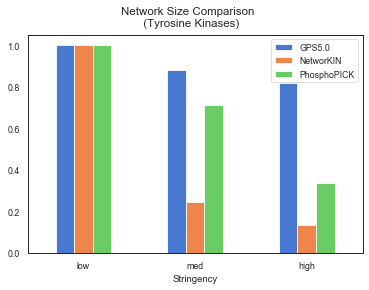

In [98]:
data_y = data_n[['Y']]
data_y.unstack().reindex(['low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Number of Edges Comparison \n (Tyrosine Kinases)')
plt.xlabel('Stringency')
plt.savefig(scatter_dir + d_type + '_bar_edges_y_1.svg', format='svg', bbox_inches="tight")
plt.show()


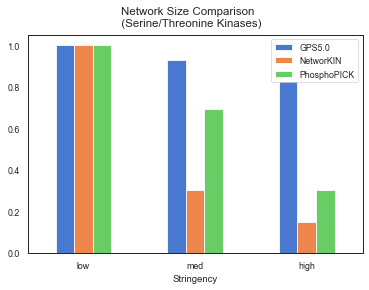

In [99]:
data_st = data_n[['S/T']]
data_st.unstack().reindex(['low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Number of Edges Comparison \n (Serine/Threonine Kinases)')
plt.xlabel('Stringency')
plt.savefig(scatter_dir + d_type + '_bar_edges_st_1.svg', format='svg', bbox_inches="tight")
plt.show()

### Unique Substrates Size Comparison

In [100]:
def count_unique (dfs, col):
    """
    get the unique number of substrates or kinases in the given dataframe
    
    Parameters
    ----------
    dfs: 
        dfs[0]: all kinases
        dfs[1]: Y kinases
        dfs[2]: S/T kinases
    
    col:
        substrate_id: get unique number of substrate predicted
        Kinase Name:  get unique number of kinases predicted
        
    Returns
    -------
        all_ct: number of all predicted substrates (predicted phosphosites) or kinases
        y_ct:   number of predicted pTyr sites or Y kinases
        st_ct:  number of predicted pSer/thr sites or S/T kinases
    """
    # create an empty list to store the counts
    count = []
    # loop through the given list of dfs
    for df in dfs:
        # count unique item in the given column
        ct = len(df[col].unique())
        # append the count to list 'count'
        count.append(ct)
        
    all_ct = count[0]  # number of all predicted substrates (predicted phosphosites) or kinases
    y_ct = count[1]    # number of predicted pTyr sites or Y kinases
    st_ct = count[2]   # number of predicted pSer/thr sites or S/T kinases
    
    return all_ct, y_ct, st_ct
    

In [101]:
# get the unique number of substrate predicted in different stringencies
col = 'substrate_id'
# PhosphoPICK
pp_s_ct, pp_s_y_ct, pp_s_st_ct = count_unique ([pp_df, pp_y, pp_st], col)
pp1_s_ct, pp1_s_y_ct, pp1_s_st_ct = count_unique ([pp1_df, pp1_y, pp1_st], col)
pp06_s_ct, pp06_s_y_ct, pp06_s_st_ct = count_unique ([pp06_df, pp06_y, pp06_st], col)
pp02_s_ct, pp02_s_y_ct, pp02_s_st_ct = count_unique ([pp02_df, pp02_y, pp02_st], col)
# NetworKIN
nw_s_ct, nw_s_y_ct, nw_s_st_ct = count_unique ([nw_df, nw_y, nw_st], col)
nw03_s_ct, nw03_s_y_ct, nw03_s_st_ct = count_unique ([nw03_df, nw03_y, nw03_st], col)
nw05_s_ct, nw05_s_y_ct, nw05_s_st_ct = count_unique ([nw05_df, nw05_y, nw05_st], col)
nw1_s_ct, nw1_s_y_ct, nw1_s_st_ct = count_unique ([nw1_df, nw1_y, nw1_st], col)
# GPS
gps_s_ct, gps_s_y_ct, gps_s_st_ct = count_unique ([gps_df, gps_y, gps_st], col)
gpsl_s_ct, gpsl_s_y_ct, gpsl_s_st_ct = count_unique ([gpsl_df, gpsl_y, gpsl_st], col)
gpsm_s_ct, gpsm_s_y_ct, gpsm_s_st_ct = count_unique ([gpsm_df, gpsm_y, gpsm_st], col)
gpsh_s_ct, gpsh_s_y_ct, gpsh_s_st_ct = count_unique ([gpsh_df, gpsh_y, gpsh_st], col)


In [102]:
# print the table for the number of unique substrates in different stringencies
data_s = pd.DataFrame([
        ('all','PhosphoPICK',pp_s_ct, pp_s_y_ct, pp_s_st_ct),
        ('all','NetworKIN',nw_s_ct, nw_s_y_ct, nw_s_st_ct),
        ('all','GPS',gps_s_ct, gps_s_y_ct, gps_s_st_ct),
        ('low','PhosphoPICK',pp1_s_ct, pp1_s_y_ct, pp1_s_st_ct),
        ('low','NetworKIN',nw03_s_ct, nw03_s_y_ct, nw03_s_st_ct),
        ('low','GPS',gpsl_s_ct, gpsl_s_y_ct, gpsl_s_st_ct),
        ('med','PhosphoPICK',pp06_s_ct, pp06_s_y_ct, pp06_s_st_ct),
        ('med','NetworKIN',nw05_s_ct, nw05_s_y_ct, nw05_s_st_ct),
        ('med','GPS',gpsm_s_ct, gpsm_s_y_ct, gpsm_s_st_ct),
        ('high','PhosphoPICK',pp02_s_ct, pp02_s_y_ct, pp02_s_st_ct),
        ('high','NetworKIN',nw1_s_ct, nw1_s_y_ct, nw1_s_st_ct),
        ('high','GPS',gpsh_s_ct, gpsh_s_y_ct, gpsh_s_st_ct)
    ], 
    columns=['Threshold', 'Predictor', 'all', 'Y', 'S/T']
)
data_s = data_s.set_index(['Threshold', 'Predictor'])
data_s

all      Y     S/T
Threshold Predictor                         
all       PhosphoPICK  235932  40036  195896
          NetworKIN    231250  39296  191954
          GPS5.0       246010  41422  204588
low       PhosphoPICK  231164  35908  195256
          NetworKIN    226287  34333  191954
          GPS5.0       246010  41422  204588
med       PhosphoPICK  224243  31395  192848
          NetworKIN    198198  13714  184484
          GPS5.0       246010  41422  204588
high      PhosphoPICK  192311  19895  172416
          NetworKIN    168913   6717  162196
          GPS5.0       246010  41422  204588

In [103]:
# normalized to low stringency
data_s_n = pd.DataFrame([
        ('low','PhosphoPICK', pp1_s_y_ct/pp1_s_y_ct, pp1_s_st_ct/pp1_s_st_ct),
        ('low','NetworKIN', nw03_s_y_ct/nw03_s_y_ct, nw03_s_st_ct/nw03_s_st_ct),
        ('low','GPS', gpsl_s_y_ct/gpsl_s_y_ct, gpsl_s_st_ct/gpsl_s_st_ct),
        ('med','PhosphoPICK', pp06_s_y_ct/pp1_s_y_ct, pp06_s_st_ct/pp1_s_st_ct),
        ('med','NetworKIN', nw05_s_y_ct/nw03_s_y_ct, nw05_s_st_ct/nw03_s_st_ct),
        ('med','GPS', gpsm_s_y_ct/gpsl_s_y_ct, gpsm_s_st_ct/gpsl_s_st_ct),
        ('high','PhosphoPICK', pp02_s_y_ct/pp1_s_y_ct, pp02_s_st_ct/pp1_s_st_ct),
        ('high','NetworKIN', nw1_s_y_ct/nw03_s_y_ct, nw1_s_st_ct/nw03_s_st_ct),
        ('high','GPS', gpsm_s_y_ct/gpsl_s_y_ct, gpsm_s_st_ct/gpsl_s_st_ct)
    ], 
    columns=['Threshold', 'Predictor', 'Y', 'S/T']
)
data_s_n = data_s_n.set_index(['Threshold', 'Predictor'])
data_s_n

Y       S/T
Threshold Predictor                      
low       PhosphoPICK  1.000000  1.000000
          NetworKIN    1.000000  1.000000
          GPS5.0       1.000000  1.000000
med       PhosphoPICK  0.874318  0.987667
          NetworKIN    0.399441  0.961084
          GPS5.0       1.000000  1.000000
high      PhosphoPICK  0.554055  0.883025
          NetworKIN    0.195643  0.844973
          GPS5.0       1.000000  1.000000

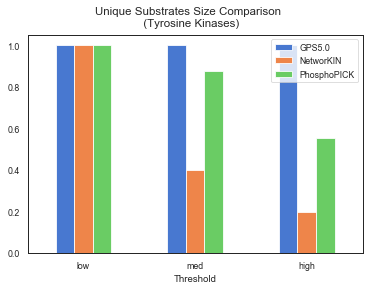

In [104]:
data_s_y = data_s_n[['Y']]
data_s_y.unstack().reindex(['low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Substrate Size Comparison')
plt.suptitle('Unique Substrates Size Comparison \n (Tyrosine Kinases)')
plt.xlabel('Threshold')
plt.savefig(scatter_dir + d_type + '_bar_sub_size_Y.svg', format='svg', bbox_inches="tight")
plt.show()


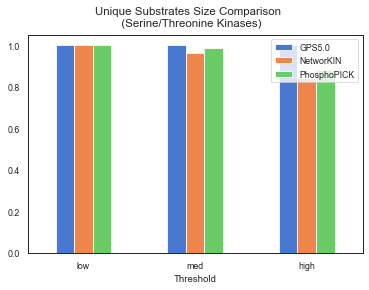

In [105]:
data_s_y = data_s_n[['S/T']]
data_s_y.unstack().reindex(['low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Substrate Size Comparison')
plt.suptitle('Unique Substrates Size Comparison \n (Serine/Threonine Kinases)')
plt.xlabel('Threshold')
plt.savefig(scatter_dir + d_type + '_bar_sub_size_ST.svg', format='svg', bbox_inches="tight")
plt.show()

### Unique Substrates Overlap Among Predictors

In [106]:
# get the list of unique substrates by kinase group
# PhosphoPICK
pp_y_sub = pp_y['substrate_id'].unique().tolist()
pp_st_sub = pp_st['substrate_id'].unique().tolist()
# NetworKIN
nw_y_sub = nw_y['substrate_id'].unique().tolist()
nw_st_sub = nw_st['substrate_id'].unique().tolist()
# GPS
gps_y_sub = gps_y['substrate_id'].unique().tolist()
gps_st_sub = gps_st['substrate_id'].unique().tolist()


In [107]:
# get the number of overlapped substrates between groups
# among pp & nw & gps
num_3_y = len(list(set(nw_y_sub) & set(pp_y_sub) & set(gps_y_sub)))
num_3_st = len(list(set(nw_st_sub) & set(pp_st_sub) & set(gps_st_sub)))

# pp & nw 
num_pp_nw_y = len(list(set(nw_y_sub) & set(pp_y_sub)))
num_pp_nw_st = len(list(set(nw_st_sub) & set(pp_st_sub)))

# gps & nw 
num_gps_nw_y = len(list(set(nw_y_sub) & set(gps_y_sub)))
num_gps_nw_st = len(list(set(nw_st_sub) & set(gps_st_sub)))

# gps & pp 
num_gps_pp_y = len(list(set(pp_y_sub) & set(gps_y_sub)))
num_gps_pp_st = len(list(set(pp_st_sub) & set(gps_st_sub)))


In [108]:
# print the table for the number of overlapped substrates between groups in the non-filtered set
data_ven_s = pd.DataFrame([
        ('PhosphoPICK',pp_s_y_ct, pp_s_st_ct),
        ('NetworKIN',nw_s_y_ct, nw_s_st_ct),
        ('GPS', gps_s_y_ct, gps_s_st_ct),
        ('NetworKIN x PhosphoPICK',num_pp_nw_y, num_pp_nw_st),
        ('NetworKIN x GPS',num_gps_nw_y, num_gps_nw_st),
        ('PhosphoPICK x GPS',num_gps_pp_y, num_gps_pp_st),
        ('all three',num_3_y, num_3_st)
    ], 
    columns=['Predictor(s)', 'Y', 'S/T']
)
data_ven_s


,Predictor(s),Y,S/T
0,PhosphoPICK,40036,195896
1,NetworKIN,39296,191954
2,GPS5.0,41422,204588
3,NetworKIN x PhosphoPICK,38332,185790
4,NetworKIN x GPS5.0,39285,191853
5,PhosphoPICK x GPS5.0,40035,195896
6,all three,38332,185790


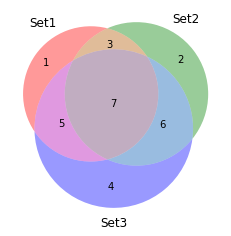

In [76]:
# this cell is use as a reference for the order of input for the venn3 module
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('Set1', 'Set2', 'Set3'))

/Users/bx2ur/opt/anaconda3/envs/notebook/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


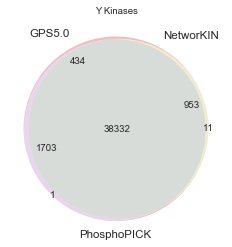

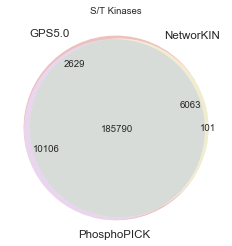

In [109]:
venn3(subsets = (num_gps_sub_y - num_gps_nw_y - num_gps_pp_y + num_3_y, 
                 num_nw_sub_y - num_gps_nw_y - num_pp_nw_y + num_3_y, 
                 num_gps_nw_y - num_3_y, 
                 num_pp_sub_y - num_gps_pp_y - num_pp_nw_y + num_3_y, 
                 num_gps_pp_y - num_3_y, 
                 num_pp_nw_y - num_3_y,
                 num_3_y),
      set_labels = ('GPS', 'NetworKIN', 'PhosphoPICK'))
plt.title('Y Kinases')
plt.savefig(scatter_dir + d_type + '_overlapped_sub_y.svg', format='svg', bbox_inches="tight")
plt.show()

venn3(subsets = (num_gps_sub_st - num_gps_nw_st - num_gps_pp_st + num_3_st, 
                 num_nw_sub_st - num_gps_nw_st - num_pp_nw_st + num_3_st, 
                 num_gps_nw_st - num_3_st, 
                 num_pp_sub_st - num_gps_pp_st - num_pp_nw_st + num_3_st, 
                 num_gps_pp_st - num_3_st, 
                 num_pp_nw_st - num_3_st,
                 num_3_st), 
      set_labels = ('GPS', 'NetworKIN', 'PhosphoPICK'))
plt.title('S/T Kinases')
plt.savefig(scatter_dir + d_type + '_overlapped_sub_st.svg', format='svg', bbox_inches="tight")
plt.show()


### Unique Kinase Size Comparson

In [110]:
# get the unique number of kinases predicted
col = 'Kinase Name'
# PhosphoPICK
pp_k_ct, pp_k_y_ct, pp_k_st_ct = count_unique ([pp_df, pp_y, pp_st], col)
pp1_k_ct, pp1_k_y_ct, pp1_k_st_ct = count_unique ([pp1_df, pp1_y, pp1_st], col)
pp06_k_ct, pp06_k_y_ct, pp06_k_st_ct = count_unique ([pp06_df, pp06_y, pp06_st], col)
pp02_k_ct, pp02_k_y_ct, pp02_k_st_ct = count_unique ([pp02_df, pp02_y, pp02_st], col)
# NetworKIN
nw_k_ct, nw_k_y_ct, nw_k_st_ct = count_unique ([nw_df, nw_y, nw_st], col)
nw03_k_ct, nw03_k_y_ct, nw03_k_st_ct = count_unique ([nw03_df, nw03_y, nw03_st], col)
nw05_k_ct, nw05_k_y_ct, nw05_k_st_ct = count_unique ([nw05_df, nw05_y, nw05_st], col)
nw1_k_ct, nw1_k_y_ct, nw1_k_st_ct = count_unique ([nw1_df, nw1_y, nw1_st], col)
# GPS
gps_k_ct, gps_k_y_ct, gps_k_st_ct = count_unique ([gps_df, gps_y, gps_st], col)
gpsl_k_ct, gpsl_k_y_ct, gpsl_k_st_ct = count_unique ([gpsl_df, gpsl_y, gpsl_st], col)
gpsm_k_ct, gpsm_k_y_ct, gpsm_k_st_ct = count_unique ([gpsm_df, gpsm_y, gpsm_st], col)
gpsh_k_ct, gpsh_k_y_ct, gpsh_k_st_ct = count_unique ([gpsh_df, gpsh_y, gpsh_st], col)


In [111]:
# print the table for the number of unique kinases in different stringencies
data_k = pd.DataFrame([
        ('all','PhosphoPICK',pp_k_ct, pp_k_y_ct, pp_k_st_ct),
        ('all','NetworKIN',nw_k_ct, nw_k_y_ct, nw_k_st_ct),
        ('all','GPS',gps_k_ct, gps_k_y_ct, gps_k_st_ct),
        ('low','PhosphoPICK',pp1_k_ct, pp1_k_y_ct, pp1_k_st_ct),
        ('low','NetworKIN',nw03_k_ct, nw03_k_y_ct, nw03_k_st_ct),
        ('low','GPS',gpsl_k_ct, gpsl_k_y_ct, gpsl_k_st_ct),
        ('med','PhosphoPICK',pp06_k_ct, pp06_k_y_ct, pp06_k_st_ct),
        ('med','NetworKIN',nw05_k_ct, nw05_k_y_ct, nw05_k_st_ct),
        ('med','GPS',gpsm_k_ct, gpsm_k_y_ct, gpsm_k_st_ct),
        ('high','PhosphoPICK',pp02_k_ct, pp02_k_y_ct, pp02_k_st_ct),
        ('high','NetworKIN',nw1_k_ct, nw1_k_y_ct, nw1_k_st_ct),
        ('high','GPS',gpsh_k_ct, gpsh_k_y_ct, gpsh_k_st_ct)
    ], 
    columns=['Threshold', 'Predictor', '# of kinases', '# of Y kinases', '# of S/T kinases']
)
data_k = data_k.set_index(['Threshold', 'Predictor'])
data_k

# of kinases  # of Y kinases  # of S/T kinases
Threshold Predictor                                                  
all       PhosphoPICK           106              19                87
          NetworKIN             190              50               140
          GPS5.0                309              65               244
low       PhosphoPICK           106              19                87
          NetworKIN             190              50               140
          GPS5.0                308              65               243
med       PhosphoPICK           106              19                87
          NetworKIN             190              50               140
          GPS5.0                308              65               243
high      PhosphoPICK           106              19                87
          NetworKIN             190              50               140
          GPS5.0                308              65               243

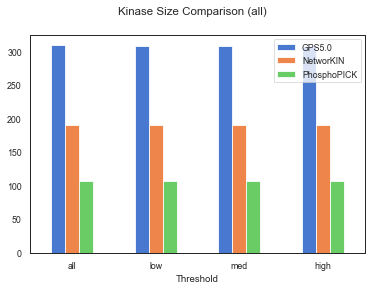

In [112]:
# the total number of kinases
data_k['# of kinases'].unstack().reindex(['all', 'low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Kinase Size Comparison (all)')
plt.xlabel('Threshold')
plt.savefig(scatter_dir + d_type + '_bar_kinase_all.svg', format='svg', bbox_inches="tight")
plt.show()

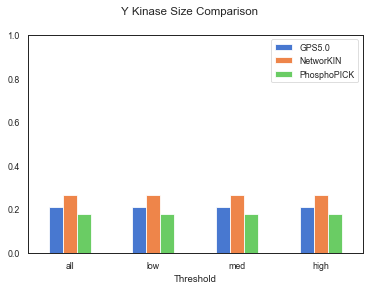

In [113]:
# the precent of Y kinases in each group
data_k_y = data_k[['# of kinases', '# of Y kinases']]
data_k_y['% of Y kinases'] = data_k_y['# of Y kinases']/data_k_y['# of kinases']
data_k_y['% of Y kinases'].unstack().reindex(['all', 'low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('Y Kinase Size Comparison')
plt.xlabel('Threshold')
plt.ylim(0,1)
plt.savefig(scatter_dir + d_type + '_bar_kinase_y.svg', format='svg', bbox_inches="tight")
plt.show()


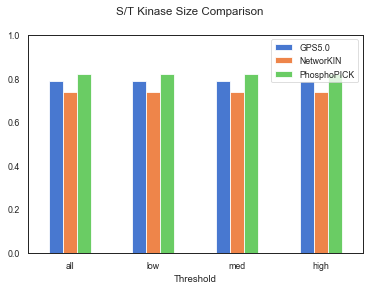

In [114]:
# the precent S/T kinases in each group
data_k_st = data_k[['# of kinases', '# of S/T kinases']]
data_k_st['% of S/T kinases'] = data_k_st['# of S/T kinases']/data_k_st['# of kinases']
data_k_st['% of S/T kinases'].unstack().reindex(['all', 'low', 'med', 'high']).plot(kind='bar').legend(['GPS', 'NetworKIN', 'PhosphoPICK'])
plt.xticks(rotation=360)
plt.suptitle('S/T Kinase Size Comparison')
plt.xlabel('Threshold')
plt.ylim(0,1)
plt.savefig(scatter_dir + d_type + '_bar_kinase_st.svg', format='svg', bbox_inches="tight")
plt.show()

### Unique Kinases Overlap Among Predictors
- we only intreseted in the low stringency in this section because:
    - there is no change in the number of predicted kinases among low, medium, and high stringencies in all predictors
    - we are only comparing the kinase network similarities in the low, medium, and high stringencies

In [149]:
# get the unique kinases predicted in each predictor
# PhosphoPICK
pp1_y_kin = pp1_y['Kinase Name'].unique().tolist()
pp1_st_kin = pp1_st['Kinase Name'].unique().tolist()
# NetworKIN
nw03_y_kin = nw03_y['Kinase Name'].unique().tolist()
nw03_st_kin = nw03_st['Kinase Name'].unique().tolist()
# GPS
gpsl_y_kin = gpsl_y['Kinase Name'].unique().tolist()
gpsl_st_kin = gpsl_st['Kinase Name'].unique().tolist()

In [150]:
# get the number of overlapped kinases between groups
# pp1 & nw03 & gpsl
num_3_y = len(list(set(nw03_y_kin) & set(pp1_y_kin) & set(gpsl_y_kin)))
num_3_st = len(list(set(nw03_st_kin) & set(pp1_st_kin) & set(gpsl_st_kin)))
# pp1 & nw03 
num_pp1_nw03_y = len(list(set(nw03_y_kin) & set(pp1_y_kin)))
num_pp1_nw03_st = len(list(set(nw03_st_kin) & set(pp1_st_kin)))
# gpsl & nw03 
num_gpsl_nw03_y = len(list(set(nw03_y_kin) & set(gpsl_y_kin)))
num_gpsl_nw03_st = len(list(set(nw03_st_kin) & set(gpsl_st_kin)))
# gpsl & pp1 
num_gpsl_pp1_y = len(list(set(pp1_y_kin) & set(gpsl_y_kin)))
num_gpsl_pp1_st = len(list(set(pp1_st_kin) & set(gpsl_st_kin)))


In [151]:
# print the table of the number of overlapped kinases between groups
data_ven = pd.DataFrame([
        ('PhosphoPICK',pp1_k_y_ct, pp1_k_st_ct),
        ('NetworKIN',nw03_k_y_ct, nw03_k_st_ct),
        ('GPS', gpsl_k_y_ct, gpsl_k_st_ct),
        ('NetworKIN x PhosphoPICK',num_pp1_nw03_y, num_pp1_nw03_st),
        ('NetworKIN x GPS',num_gpsl_nw03_y, num_gpsl_nw03_st),
        ('PhosphoPICK x GPS',num_gpsl_pp1_y, num_gpsl_pp1_st),
        ('all three',num_3_y, num_3_st)
    ], 
    columns=['Predictor(s)', 'Y', 'S/T']
)
data_ven

,Predictor(s),Y,S/T
0,PhosphoPICK,19,87
1,NetworKIN,50,140
2,GPS5.0,65,243
3,NetworKIN x PhosphoPICK,11,68
4,NetworKIN x GPS5.0,39,117
5,PhosphoPICK x GPS5.0,19,87
6,all three,11,68


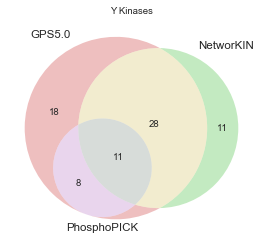

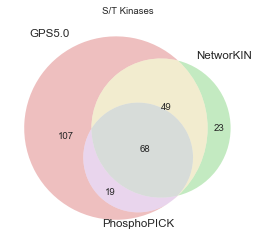

In [164]:
venn3(subsets = (num_gps_kin_y - num_gps_nw_y - num_gps_pp_y + num_3_y, 
                 num_nw_kin_y - num_gps_nw_y - num_pp_nw_y + num_3_y, 
                 num_gps_nw_y - num_3_y, 
                 num_pp_kin_y - num_gps_pp_y - num_pp_nw_y + num_3_y, 
                 num_gps_pp_y - num_3_y, 
                 num_pp_nw_y - num_3_y,
                 num_3_y), 
      set_labels = ('GPS', 'NetworKIN', 'PhosphoPICK'))
plt.title('Y Kinases')
plt.savefig(scatter_dir + d_type + '_overlapped_kin_y.svg', format='svg', bbox_inches="tight")
plt.show()

venn3(subsets = (num_gps_kin_st - num_gps_nw_st - num_gps_pp_st + num_3_st, 
                 num_nw_kin_st - num_gps_nw_st - num_pp_nw_st + num_3_st, 
                 num_gps_nw_st - num_3_st, 
                 num_pp_kin_st - num_gps_pp_st - num_pp_nw_st + num_3_st, 
                 num_gps_pp_st - num_3_st, 
                 num_pp_nw_st - num_3_st,
                 num_3_st), 
      set_labels = ('GPS', 'NetworKIN', 'PhosphoPICK'))
plt.title('S/T Kinases')
plt.savefig(scatter_dir + d_type + '_overlapped_kin_st.svg', format='svg', bbox_inches="tight")
plt.show()

## Network Degree comparson between predictors

In [120]:
def get_degree(dfs, thresh, predictor, type):
    """
    get the substrate or kinase network degrees of the given dataframe
    
    Parameters
    ----------
    dfs: 
        dfs[0]: all kinases
        dfs[1]: Y kinases
        dfs[2]: S/T kinases    
    thresh: 
        'low', 'med', 'high'   
    predictor: 
        'PhosphoPICK', 'NetworKIN', 'GPS'   
    type:
        'sub': get substrate network degrees 
        'kin': get kinase network degrees 
        
    Returns
    -------
        all: df of the degrees with all data
        y:   df of the degrees with only Y kinase
        st:  df of the degrees with only S/T kinase
    """
    
    if type == 'kin':
        groupby = 'Kinase Name'
        set_idx = 'substrate_id'
    elif type == 'sub':
        groupby = 'substrate_id'
        set_idx = 'Kinase Name'
        
    degs = []
    for df in dfs:
        deg = df.groupby(groupby).count()
        deg = deg[[set_idx]].reset_index()
        deg = deg.rename(columns={set_idx: 'degree'})
        # add threshold and predictor coloumns, these are needed to plot the violin plots
        deg['threshold'] = thresh
        deg['predictor'] = predictor
        degs.append(deg)
        
    all = degs[0] # df of the degrees with all data
    y = degs[1]   # df of the degrees with only Y kinase
    st = degs[2]  # df of the degrees with only S/T kinase
    
    return all, y, st

In [231]:
def merge_3_dfs (dfs, col):
    """
    merge 3 dfs with common columns
    
    Parameters
    ----------
    dfs: in the order of [PhosphoPICK_df, NetworKIN_df, GPS_df]
    col:
        'Kinase Name':  for merging the kinase degree dfs
        'substrate_id': for merging the substrate degree dfs
    
    Returns
    -------
        overlap: the merged dataframe
    """
    overlap = dfs[0].merge(dfs[1], on=[col], how = 'inner')
    overlap = overlap.rename(columns={"degree_x": "pp", "degree_y": "nw"})
    overlap = overlap.merge(dfs[2], on=[col], how = 'inner')
    overlap = overlap.rename(columns={"degree": "gps"})
    overlap = overlap[[col, 'threshold', 'pp', 'nw', 'gps']]
    
    return overlap

In [ ]:
def plot_df (df, kinase, plot):
    """
    set up to plot multiple plots
    
    Parameters
    ----------
    df: dataframe
    plot:
        'Kinase':     plot the kinase degree comparesion between predictors
        'Substrates': plot the substrate degree comparesion between predictors
    
    Returns
    -------
        summary: summary dataframe for the Pearson Correlation Coefficients
    """
    if plot == 'Kinase':
        # plot and calculate the Pearson Correlation Coefficients
        corr1_l = plot_scatter (df, 'pp', 'gps', 'low',  kinase)
        corr1_m = plot_scatter (df, 'pp', 'gps', 'med',  kinase)
        corr1_h = plot_scatter (df, 'pp', 'gps', 'high',  kinase) 
        corr2_l = plot_scatter (df, 'pp', 'nw', 'low',  kinase)
        corr2_m = plot_scatter (df, 'pp', 'nw', 'med',  kinase)
        corr2_h = plot_scatter (df, 'pp', 'nw', 'high',  kinase)
        corr3_l = plot_scatter (df, 'gps', 'nw', 'low',  kinase)
        corr3_m = plot_scatter (df, 'gps', 'nw', 'med',  kinase)
        corr3_h = plot_scatter (df, 'gps', 'nw', 'high',  kinase)
    if plot == 'Substrates':
        corr1_l = plot_contour (df, 'pp', 'gps', 'low',  kinase)
        corr1_m = plot_contour (df, 'pp', 'gps', 'med',  kinase)
        corr1_h = plot_contour (df, 'pp', 'gps', 'high',  kinase) 
        corr2_l = plot_contour (df, 'pp', 'nw', 'low',  kinase)
        corr2_m = plot_contour (df, 'pp', 'nw', 'med',  kinase)
        corr2_h = plot_contour (df, 'pp', 'nw', 'high',  kinase)
        corr3_l = plot_contour (df, 'gps', 'nw', 'low',  kinase)
        corr3_m = plot_contour (df, 'gps', 'nw', 'med',  kinase)
        corr3_h = plot_contour (df, 'gps', 'nw', 'high',  kinase)
    
    # define the summary dataframe for the Pearson Correlation Coefficients
    summary = pd.DataFrame([
        ('PhosphoPICK','GPS','low', corr1_l[0], corr1_l[1]),
        ('PhosphoPICK','GPS', 'med', corr1_m[0], corr1_m[1]),
        ('PhosphoPICK','GPS','high', corr1_h[0], corr1_h[1]),
        ('PhosphoPICK','NetworKIN','low', corr2_l[0], corr2_l[1]),
        ('PhosphoPICK','NetworKIN','med', corr2_m[0], corr2_m[1]),
        ('PhosphoPICK','NetworKIN','high', corr2_h[0], corr2_h[1]),
        ('GPS','NetworKIN','low', corr3_l[0], corr3_l[1]),
        ('GPS','NetworKIN','med', corr3_m[0], corr3_m[1]),
        ('GPS','NetworKIN','high', corr3_h[0], corr3_h[1])
    ], 
    columns=['Predictor1', 'Predictor2', 'Threshold', 'Pearson Coefficient', 'p-value']
    )
    
    return summary


### Substrate Network Degree comparson between predictors

In [254]:
# get the substrate network degrees
# PhosphoPICK
pp_sub, pp_y_sub, pp_st_sub = get_degree([pp_df, pp_y, pp_st], 'all', 'PhosphoPICK', 'sub')
pp1_sub, pp1_y_sub, pp1_st_sub = get_degree([pp1_df, pp1_y, pp1_st], 'low', 'PhosphoPICK', 'sub')
pp06_sub, pp06_y_sub, pp06_st_sub = get_degree([pp06_df, pp06_y, pp06_st], 'med', 'PhosphoPICK', 'sub')
pp02_sub, pp02_y_sub, pp02_st_sub = get_degree([pp02_df, pp02_y, pp02_st], 'high', 'PhosphoPICK', 'sub')
# NetworKIN
nw_sub, nw_y_sub, nw_st_sub = get_degree([nw_df, nw_y, nw_st], 'all', 'NetworKIN', 'sub')
nw03_sub, nw03_y_sub, nw03_st_sub = get_degree([nw03_df, nw03_y, nw03_st], 'low', 'NetworKIN', 'sub')
nw05_sub, nw05_y_sub, nw05_st_sub = get_degree([nw05_df, nw05_y, nw05_st], 'med', 'NetworKIN', 'sub')
nw1_sub, nw1_y_sub, nw1_st_sub = get_degree([nw1_df, nw1_y, nw1_st], 'high', 'NetworKIN', 'sub')
# GPS
gps_sub, gps_y_sub, gps_st_sub = get_degree([gps_df, gps_y, gps_st], 'all', 'GPS', 'sub')
gpsl_sub, gpsl_y_sub, gpsl_st_sub = get_degree([gpsl_df, gpsl_y, gpsl_st], 'low', 'GPS', 'sub')
gpsm_sub, gpsm_y_sub, gpsm_st_sub = get_degree([gpsm_df, gpsm_y, gpsm_st], 'med', 'GPS', 'sub')
gpsh_sub, gpsh_y_sub, gpsh_st_sub = get_degree([gpsh_df, gpsh_y, gpsh_st], 'high', 'GPS', 'sub')


In [122]:
def sub_violin(df, kinase):
    """
    The violin plot is the final representation of the substrate degree comparison
    plot the violin plot for the substrate degrees across different stringencies in all predictors
    
    Parameters
    ----------
    df:
        the concat dataframe for the substrate network degrees of all three predictors
    kinase:
        'Y': df only contains Y kinases
        'S_T': df only contains S/T kinases
    """
    if kinase == 'Y':
        kin_name = 'Tyrosine'
    elif kinase == 'S_T':
        kin_name = 'Serine/Threonine '
    plt.figure(figsize=(30,10))
    sns.violinplot(x= 'predictor', y="degree", hue="threshold", data=df, palette="Reds", linewidth=1.5, width = 1)
    plt.title('Predicted Substrate Degree Comparison (' + kin_name + ' Kinase)')
    plt.savefig(violin_dir + d_type + '_SubstrateNetwork_' + kinase + '.svg', format='svg', bbox_inches="tight")
    plt.show()
   

In [123]:
# def sub_boxplot(df_list, plot, threshold, kinase):
#     """
#     plot box plots for the given dataframes
    
#     Parameters
#     ----------
#     df_list: a list of dfs
#         df_list[0]: NetworKIN
#         df_list[1]: GPS
#         df_list[2]: PhosphoPICK
#     plot (just for title and file naming): 
#         'Substrate', 'Kinase' 
#     threshold (just for title and file naming): stringency of the given dfs
#         'all', 'low', 'medium', 'high'
#     kinase (just for title and file naming): kinase type of the given dfs
#         'Y kinase', 'S/T kinase'
#     """
    
#     labels = ['NetworKIN', 'GPS', 'PhosphoPICK']
#     plt.figure(figsize=(10,5))
#     plt.boxplot(df_list, labels=labels)
#     plt.suptitle('Predicted ' + plot + ' Degree Comparison')
#     plt.title('Threshold: ' + threshold + ', ' + kinase, fontsize=10)
#     plt.savefig(box_dir + d_type + '_' + plot + 'Network_' + threshold + '_' + kinase + '.svg', format='svg', bbox_inches="tight")
#     plt.show()

In [251]:
# def plot_contour (df, x_col, y_col, threshold, kinase):
#     """
#     contour plots for the given dataframe.  
#     This plot only includes the substrates (kinases) predicted by all three predictors
    
#     Parameters
#     ----------
#     df: merged df that only includes the substrates predicted by all three predictors
#     x_col and y_col:  the two predictor that are being compared 
#         'pp': PhosphoPICK
#         'nw': NetworKIN
#         'gps': GPS
#     threshold (just for title and file naming): stringency of the given df
#         'all', 'low', 'medium', 'high'
#     kinase (just for title and file naming): kinase type of the given df
#         'Y kinase', 'S/T kinase'
#     plot (just for title and file naming): 
#         'Substrate', 'Kinase' 

#     Returns
#     -------
#         corr: [pearson coefficient, p-value]
#     """
#     df = df[df['threshold'] == threshold]
    
#     if x_col == 'pp':
#         x_name = 'PhosphoPICK'
#     elif x_col == 'nw':
#         x_name = 'NetworKIN'
#     elif x_col == 'gps':
#         x_name = 'GPS'
        
#     if y_col == 'pp':
#         y_name = 'PhosphoPICK'
#     elif y_col == 'nw':
#         y_name = 'NetworKIN'
#     elif y_col == 'gps':
#         y_name = 'GPS'
    
#     corr = pearsonr(df[x_col],df[y_col])   
    
#     sns.kdeplot(df[x_col], df[y_col], cmap="Reds", shade=True, shade_lowest=True, )
#     plt.suptitle('Predicted Substrate Degree Comparison (' + x_name + ' vs ' + y_name + ')')
#     plt.title('Threshold: ' + threshold + ', ' + kinase, fontsize=10)
#     plt.xlabel(x_name)
#     plt.ylabel(y_name)
#     plt.savefig(contour_dir + d_type + '_SubstrateNetwork_' + x_name + '_' + y_name  + '_' + threshold + '_' + kinase + '.svg', format='svg', bbox_inches="tight")
#     plt.show()
    
#     return corr

In [178]:
# concat dfs
# Y kinases
df_y_sub = pd.concat([gpsl_y_sub, gpsm_y_sub, gpsh_y_sub,
                      nw03_y_sub, nw05_y_sub, nw1_y_sub,
                      pp1_y_sub, pp06_y_sub, pp02_y_sub
                      ])
# S/T kinases
df_st_sub = pd.concat([gpsl_st_sub, gpsm_st_sub, gpsh_st_sub,
                       nw03_st_sub, nw05_st_sub, nw1_st_sub, 
                       pp1_st_sub, pp06_st_sub, pp02_st_sub
                       ])


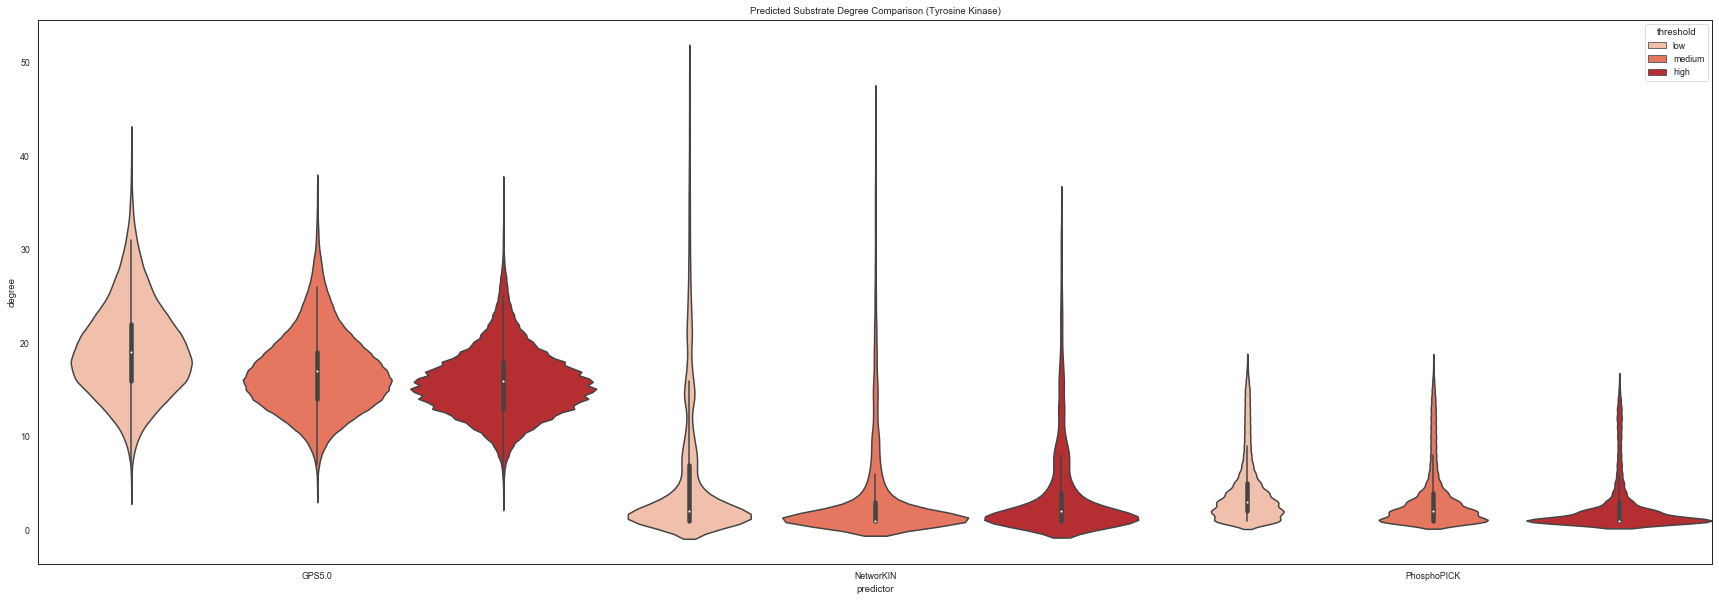

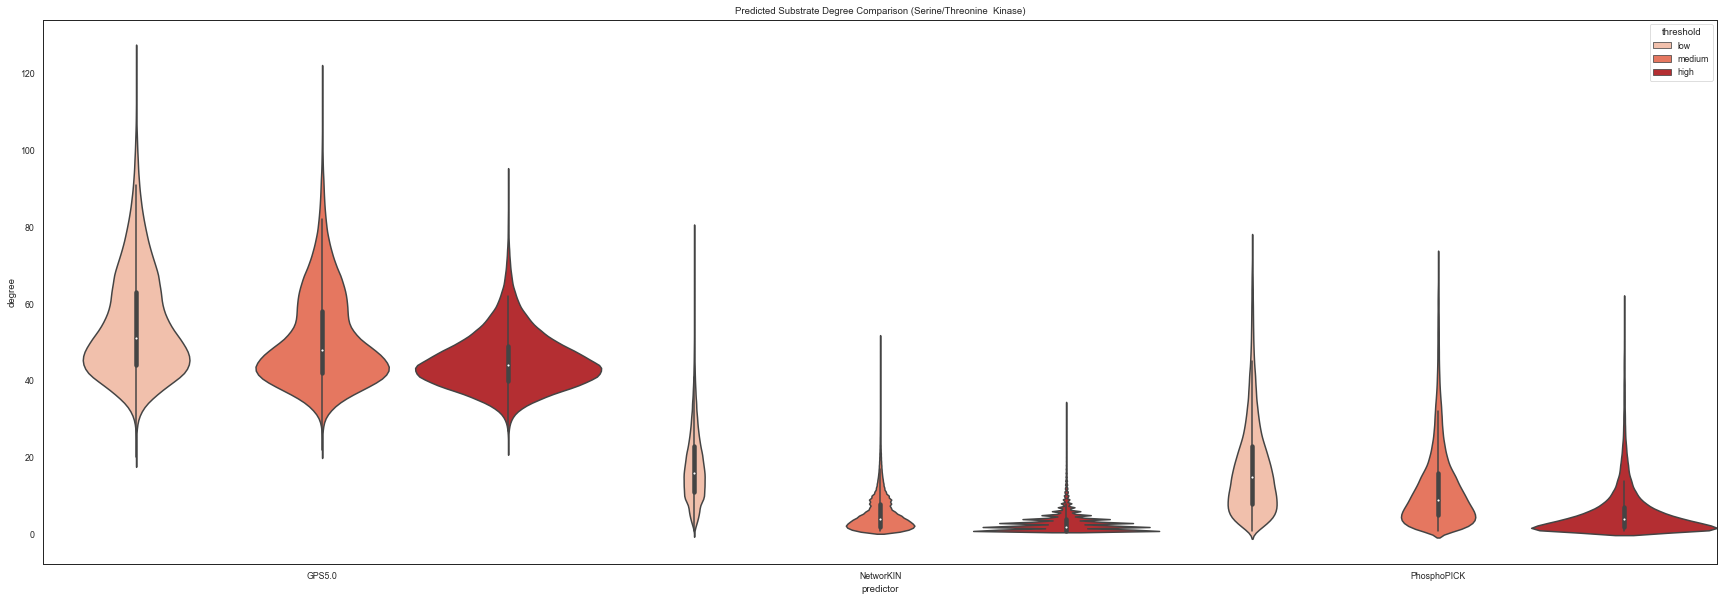

In [127]:
# plot the violin plot for the substrate degrees across different stringencies in all predictors
sub_violin(df_y_sub, 'Y')
sub_violin(df_st_sub, 'S_T')

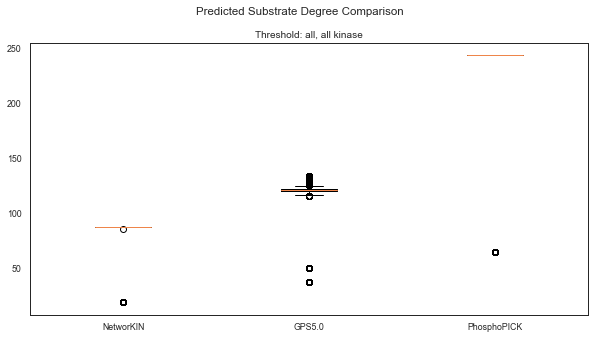

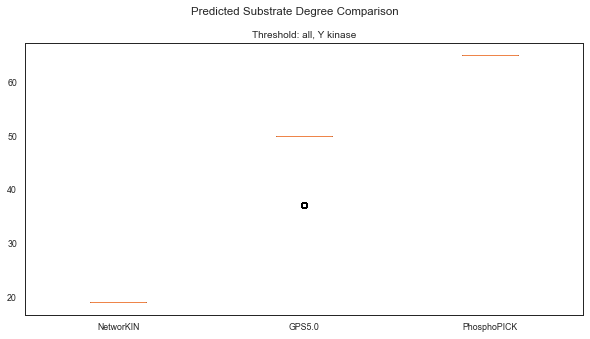

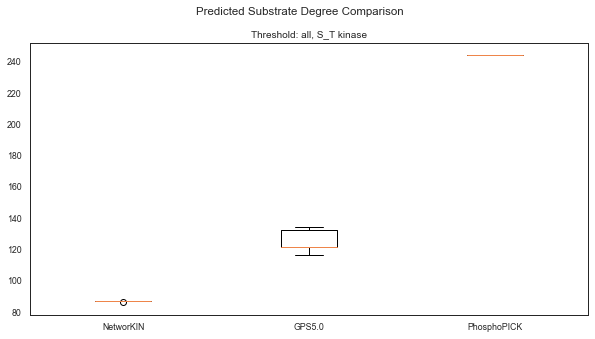

In [128]:
# # Box plot no stringency
# all_list = [pp_sub['degree'], nw_sub['degree'],gps_sub['degree']]
# sub_boxplot(all_list, 'Substrate', 'all', 'all kinase')
# y_list = [pp_y_sub['degree'], nw_y_sub['degree'],gps_y_sub['degree']]
# sub_boxplot(y_list, 'Substrate', 'all', 'Y kinase')
# st_list = [pp_st_sub['degree'], nw_st_sub['degree'],gps_st_sub['degree']]
# sub_boxplot(st_list, 'Substrate', 'all', 'S_T kinase')


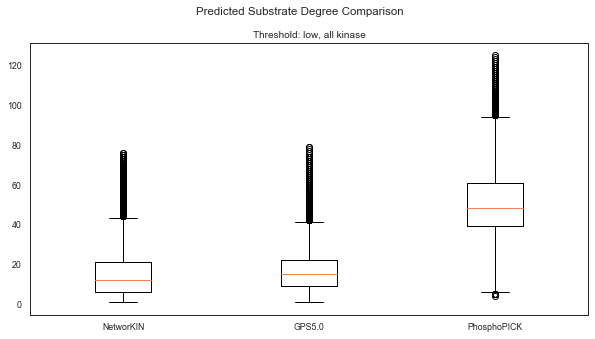

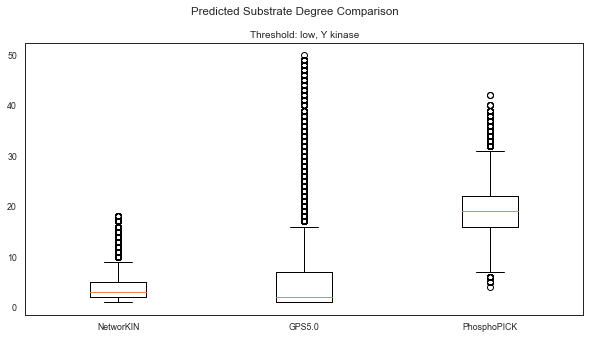

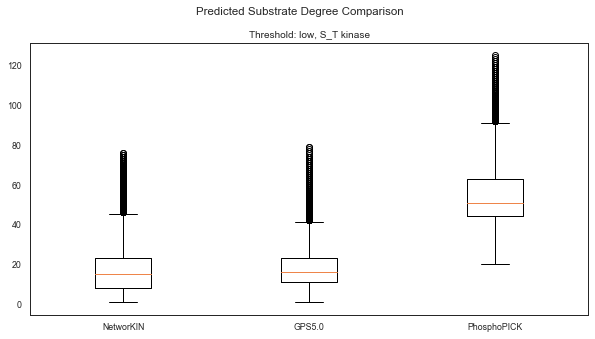

In [129]:
# # Box plot low stringency
# all_llist = [pp1_sub['degree'], nw03_sub['degree'],gpsl_sub['degree']]
# sub_boxplot(all_llist, 'Substrate', 'low', 'all kinase')
# y_llist = [pp1_y_sub['degree'], nw03_y_sub['degree'],gpsl_y_sub['degree']]
# sub_boxplot(y_llist, 'Substrate', 'low', 'Y kinase')
# st_llist = [pp1_st_sub['degree'], nw03_st_sub['degree'],gpsl_st_sub['degree']]
# sub_boxplot(st_llist, 'Substrate', 'low', 'S_T kinase')


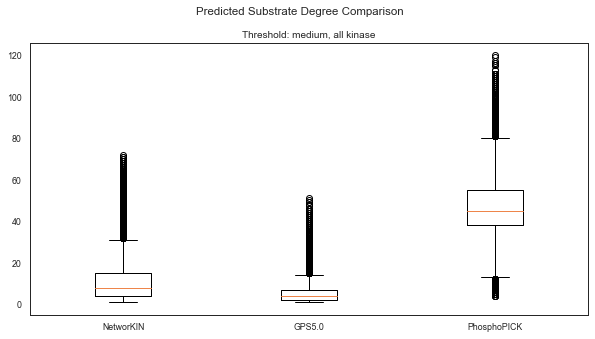

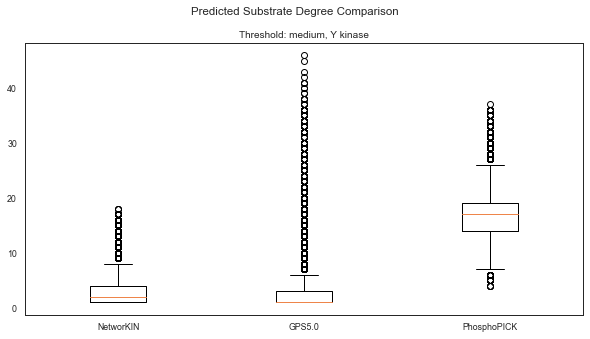

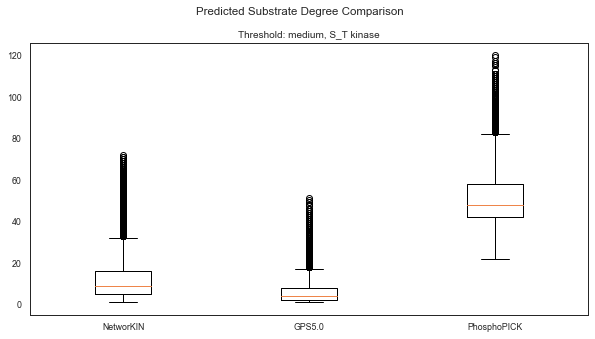

In [130]:
# # Box plot medium stringency
# all_mlist = [pp06_sub['degree'], nw05_sub['degree'],gpsm_sub['degree']]
# sub_boxplot(all_mlist, 'Substrate', 'medium', 'all kinase')
# y_mlist = [pp06_y_sub['degree'], nw05_y_sub['degree'],gpsm_y_sub['degree']]
# sub_boxplot(y_mlist, 'Substrate', 'medium', 'Y kinase')
# st_mlist = [pp06_st_sub['degree'], nw05_st_sub['degree'],gpsm_st_sub['degree']]
# sub_boxplot(st_mlist, 'Substrate', 'medium', 'S_T kinase')


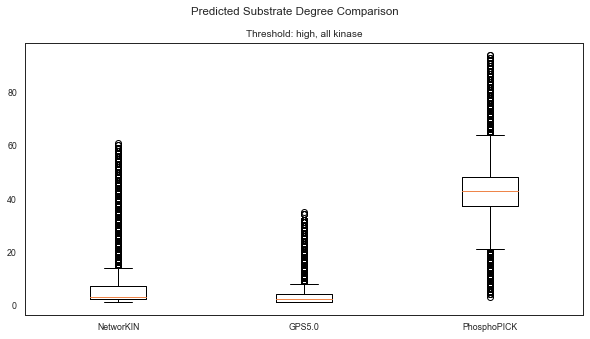

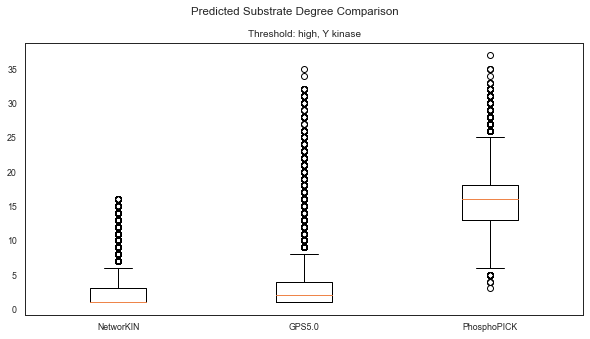

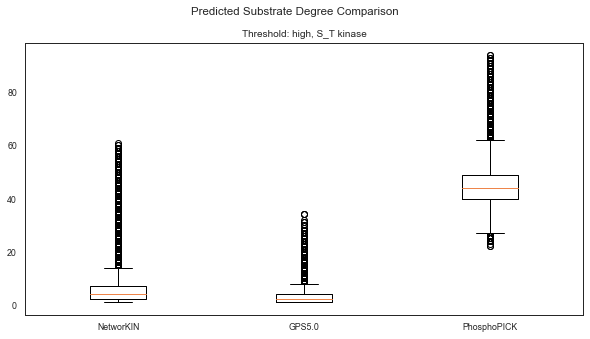

In [131]:
# # Box plot high stringency
# all_hlist = [pp02_sub['degree'], nw1_sub['degree'],gpsh_sub['degree']]
# sub_boxplot(all_hlist, 'Substrate', 'high', 'all kinase')
# y_hlist = [pp02_y_sub['degree'], nw1_y_sub['degree'],gpsh_y_sub['degree']]
# sub_boxplot(y_hlist, 'Substrate', 'high', 'Y kinase')
# st_hlist = [pp02_st_sub['degree'], nw1_st_sub['degree'],gpsh_st_sub['degree']]
# sub_boxplot(st_hlist, 'Substrate', 'high', 'S_T kinase')


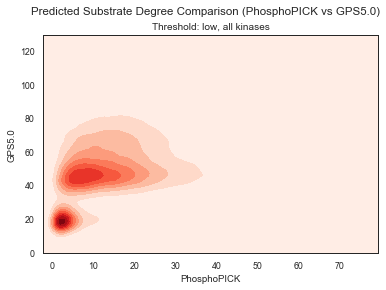

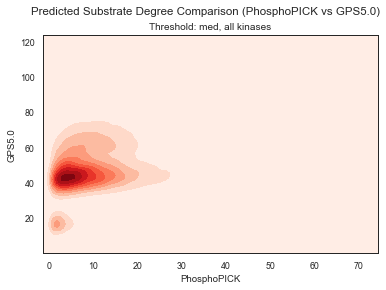

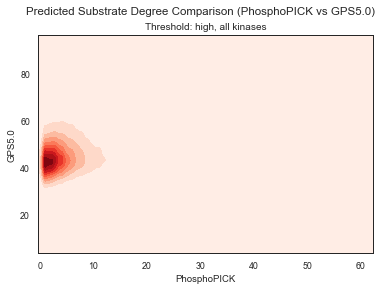

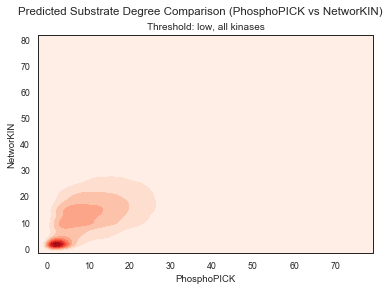

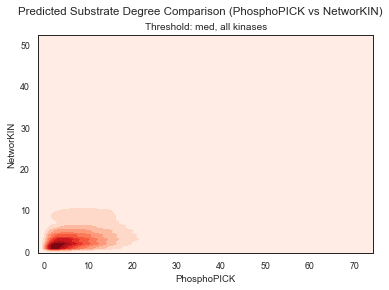

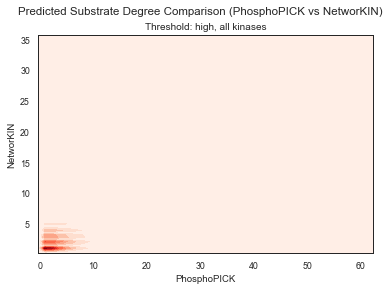

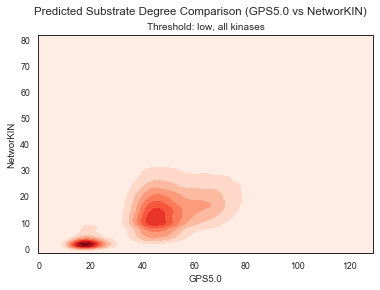

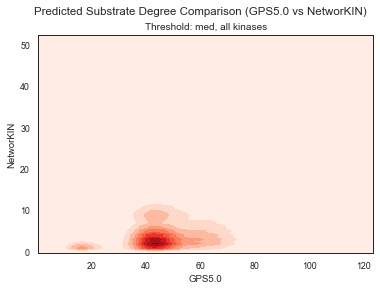

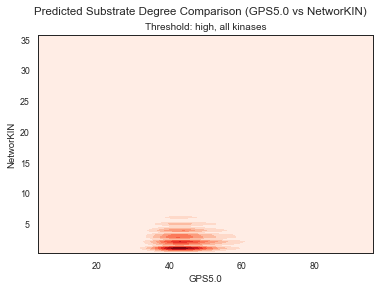

In [238]:
# # Contour plot across all stringencies (all kinases included)
# # merge substrate degree dfs by stringency 
# sub_o_lo = merge_3_dfs ([pp1_sub, nw03_sub, gpsl_sub],'substrate_id')
# sub_o_md = merge_3_dfs ([pp06_sub, nw05_sub, gpsm_sub],'substrate_id')
# sub_o_hi = merge_3_dfs ([pp02_sub, nw1_sub, gpsh_sub],'substrate_id')
# # concat all dfs into one
# sub_combined_df = pd.concat([sub_o_lo, sub_o_md, sub_o_hi])
# # plot and calculate the pearson coefficient 
# sub_summary_all = plot_df (sub_combined_df, 'all kinases', 'Substrates')


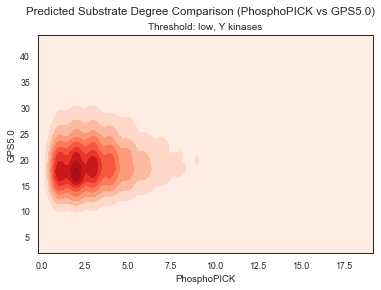

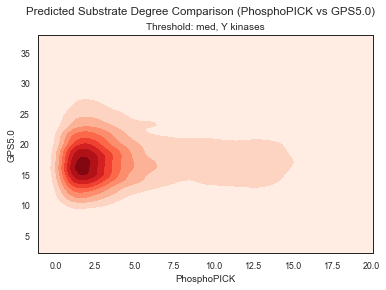

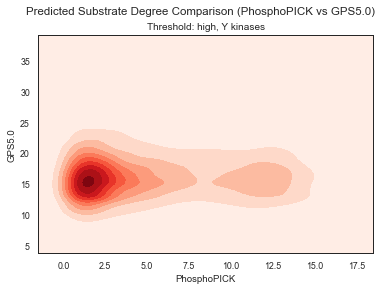

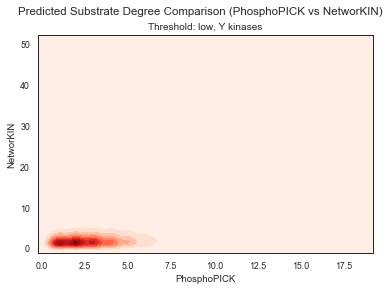

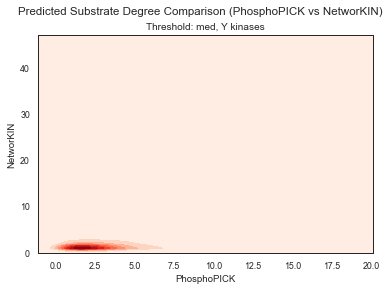

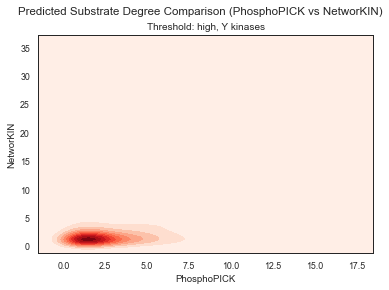

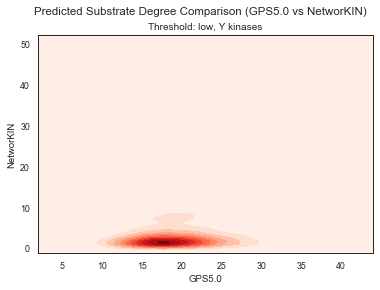

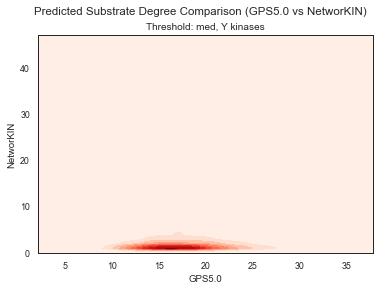

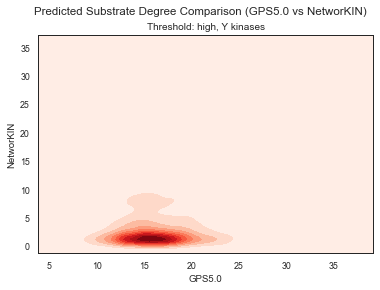

In [253]:
# # Contour plot across all stringencies (Y kinases)
# # merge substrate degree dfs by stringency
# sub_o_lo_y = merge_3_dfs ([pp1_y_sub, nw03_y_sub, gpsl_y_sub],'substrate_id')
# sub_o_md_y = merge_3_dfs ([pp06_y_sub, nw05_y_sub, gpsm_y_sub],'substrate_id')
# sub_o_hi_y = merge_3_dfs ([pp02_y_sub, nw1_y_sub, gpsh_y_sub],'substrate_id')
# # concat all dfs into one
# sub_combined_df_y = pd.concat([sub_o_lo_y, sub_o_md_y, sub_o_hi_y])
# # plot and calculate the pearson coefficient
# sub_summary_y = plot_df (sub_combined_df_y, 'Y kinases', 'Substrates')


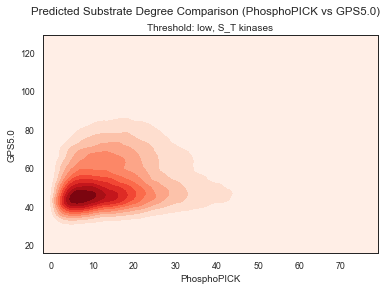

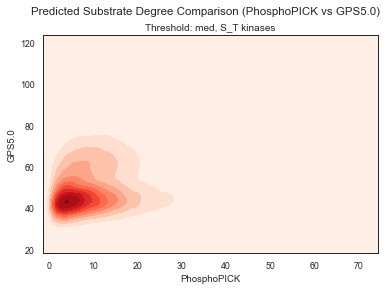

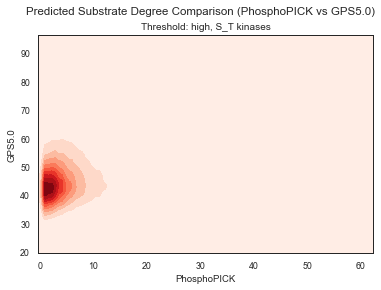

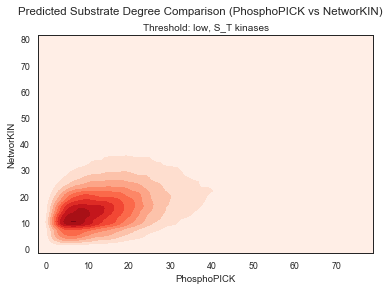

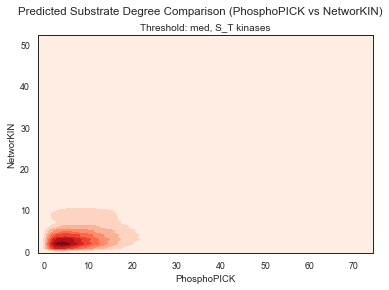

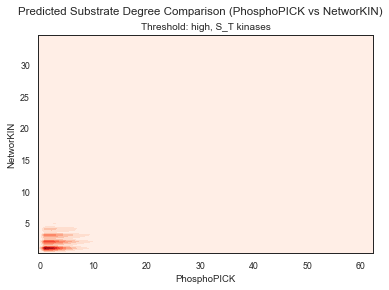

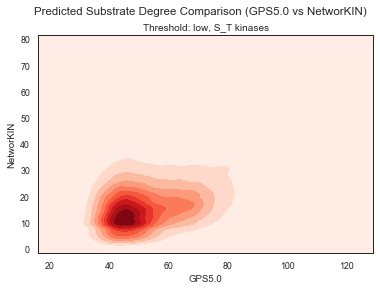

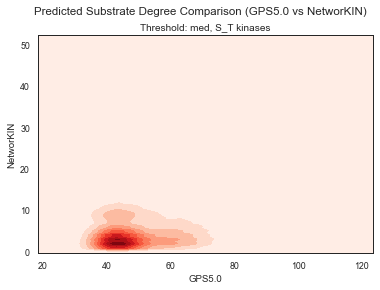

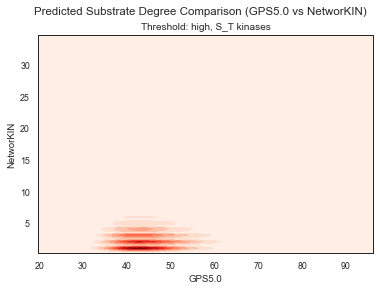

In [255]:
# # Contour plot across all stringencies (S/T kinases)
# # merge substrate degree dfs by stringency
# sub_o_lo_st = merge_3_dfs ([pp1_st_sub, nw03_st_sub, gpsl_st_sub],'substrate_id')
# sub_o_md_st = merge_3_dfs ([pp06_st_sub, nw05_st_sub, gpsm_st_sub],'substrate_id')
# sub_o_hi_st = merge_3_dfs ([pp02_st_sub, nw1_st_sub, gpsh_st_sub],'substrate_id')
# # concat all dfs into one
# sub_combined_df_st = pd.concat([sub_o_lo_st, sub_o_md_st, sub_o_hi_st])
# # plot and calculate the pearson coefficient
# sub_summary_st = plot_df (sub_combined_df_st, 'S_T kinases', 'Substrates')# # Contour plot: high stringency


In [257]:
# # print summary table for the calculated pearson coefficients
# summary_sub = sub_summary_all.merge(sub_summary_y, on=['Predictor1', 'Predictor2', 'Threshold'], how = 'inner')
# summary_sub = summary_sub.rename(columns={'Pearson Coefficient_x': 'Pearson Coefficient_all', 
#                                           'p-value_x': 'p-value_all',
#                                           'Pearson Coefficient_y': 'Pearson Coefficient_Y', 
#                                           'p-value_y': 'p-value_Y'})
# summary_sub = summary_sub.merge(sub_summary_st, on=['Predictor1', 'Predictor2', 'Threshold'], how = 'inner')
# summary_sub = summary_sub.rename(columns={'Pearson Coefficient': 'Pearson Coefficient_S/T', 
#                                           'p-value_x': 'p-value_S/T'})
# summary_sub

,Predictor1,Predictor2,Threshold,Pearson Coefficient_all,p-value_all,Pearson Coefficient_Y,p-value_Y,Pearson Coefficient_S/T,p-value
0,PhosphoPICK,GPS5.0,low,0.335220,0.000000e+00,0.077148,9.921368e-42,0.123389,0.000000e+00
1,PhosphoPICK,GPS5.0,med,0.189605,0.000000e+00,0.045354,7.679225e-07,0.115319,0.000000e+00
2,PhosphoPICK,GPS5.0,high,0.081214,2.579970e-211,0.066494,2.116722e-06,0.080017,4.389579e-198
3,PhosphoPICK,NetworKIN,low,0.515442,0.000000e+00,0.633029,0.000000e+00,0.431468,0.000000e+00
4,PhosphoPICK,NetworKIN,med,0.497284,0.000000e+00,0.659122,0.000000e+00,0.495113,0.000000e+00
5,PhosphoPICK,NetworKIN,high,0.502554,0.000000e+00,0.645912,0.000000e+00,0.522056,0.000000e+00
6,GPS5.0,NetworKIN,low,0.475350,0.000000e+00,0.179207,8.442141e-220,0.307241,0.000000e+00
7,GPS5.0,NetworKIN,med,0.184083,0.000000e+00,0.074537,4.247994e-16,0.168736,0.000000e+00
8,GPS5.0,NetworKIN,high,-0.019717,5.462937e-14,0.035893,1.053696e-02,0.048163,7.224724e-73


### Kinase Network Degree comparson between predictors

In [155]:
# get the kinase network degrees
# PhosphoPICK
pp_kin, pp_y_kin, pp_st_kin = get_degree([pp_df, pp_y, pp_st], 'all', 'PhosphoPICK', 'kin')
pp1_kin, pp1_y_kin, pp1_st_kin = get_degree([pp1_df, pp1_y, pp1_st], 'low', 'PhosphoPICK', 'kin')
pp06_kin, pp06_y_kin, pp06_st_kin = get_degree([pp06_df, pp06_y, pp06_st], 'med', 'PhosphoPICK', 'kin')
pp02_kin, pp02_y_kin, pp02_st_kin = get_degree([pp02_df, pp02_y, pp02_st], 'high', 'PhosphoPICK', 'kin')
# NetworKIN
nw_kin, nw_y_kin, nw_st_kin = get_degree([nw_df, nw_y, nw_st], 'all', 'NetworKIN', 'kin')
nw03_kin, nw03_y_kin, nw03_st_kin = get_degree([nw03_df, nw03_y, nw03_st], 'low', 'NetworKIN', 'kin')
nw05_kin, nw05_y_kin, nw05_st_kin = get_degree([nw05_df, nw05_y, nw05_st], 'med', 'NetworKIN', 'kin')
nw1_kin, nw1_y_kin, nw1_st_kin = get_degree([nw1_df, nw1_y, nw1_st], 'high', 'NetworKIN', 'kin')
# GPS
gps_kin, gps_y_kin, gps_st_kin = get_degree([gps_df, gps_y, gps_st], 'all', 'GPS', 'kin')
gpsl_kin, gpsl_y_kin, gpsl_st_kin = get_degree([gpsl_df, gpsl_y, gpsl_st], 'low', 'GPS', 'kin')
gpsm_kin, gpsm_y_kin, gpsm_st_kin = get_degree([gpsm_df, gpsm_y, gpsm_st], 'med', 'GPS', 'kin')
gpsh_kin, gpsh_y_kin, gpsh_st_kin = get_degree([gpsh_df, gpsh_y, gpsh_st], 'high', 'GPS', 'kin')


In [136]:
def outlier_treatment(datacolumn):
    """
    get the lower and upper range for the outlier detection
    
    Parameters
    ----------
        datacolumn: df column
        
    Returns
    -------
        lower_range,upper_range
    """
    datacolumn = sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range

In [156]:
def label_point(x, y, val): 
    """
    selectively label data points
    
    Parameters
    ----------
    x: column name, data (predictor) repersented on x-axis
        'pp', 'nw', 'gps'
    y: column name,data (predictor) repersented on y-axis
        'pp', 'nw', 'gps'
    val: column name, for the lables
        'substrate_id': substrates
        'Kinase Name': kinases 
        
    """
#     # assume there is linear correlation 
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     b = []
#     # Make fit #
#     regression = ols("y ~ x", data=dict(x=a['x'], y=a['y'])).fit()
#     # Find outliers #
#     test = regression.outlier_test()
#     #print(regression.summary())   
#     for i,t in enumerate(test['bonf(p)']):
#         if t < 0.5:
#             b.append(i)

    # outliers of the data representing on the x-axis      
    lower_x,upper_x = outlier_treatment(a['x'])
    filtered_entries_x = a[(a['x'] > upper_x) | (a['x'] < lower_x)]
    x_ = filtered_entries_x.index.tolist()
    #x_ = [item for item in x_ if item not in b]
    
    # outliers of the data representing on the y-axis   
    lower_y,upper_y = outlier_treatment(a['y'])
    filtered_entries_y = a[(a['y'] > upper_y) | (a['y'] < lower_y)]
    y_ = filtered_entries_y.index.tolist()
    #y_ = [item for item in y_ if item not in b]

#    # label the outliers of the assumed linear correlation in red
#     texts = [plt.text(x[i], y[i], val[i]) for i in b]
#     adjust_text(texts, expand_text = (1.5, 2), force_text =(0.25, 0.75),arrowprops=dict(arrowstyle='->', color = ('tab:red')), on_basemap = True)
    
    # label the outliers of the data representing on the x-axis in blue
    texts = [plt.text(x[i], y[i], val[i]) for i in x_ ]
    adjust_text(texts, expand_text = (1.5, 2), force_text =(0.25, 0.75),arrowprops=dict(arrowstyle='->', color = ('tab:blue')), on_basemap = True)
    # label the outliers of the data representing on the y-axis in green
    texts = [plt.text(x[i], y[i], val[i]) for i in y_]
    adjust_text(texts, expand_text = (1.5, 2), force_text =(0.25, 0.75),arrowprops=dict(arrowstyle='->', color = ('tab:green')), on_basemap = True)
      

In [258]:
def plot_scatter (df, x_col, y_col, threshold, kinase):
    """
    plot scatter plots for the given dataframe
    
    Parameters
    ----------
    x_col: column name, data (predictor) repersented on x-axis
        'pp', 'nw', 'gps'
    y_col: column name,data (predictor) repersented on y-axis
        'pp', 'nw', 'gps'
    threshold:
        'low', 'medium', 'high'
    kinase: 
        'Y kinases', 'S/T kinases'
    
    Returns
    -------
         corr: [pearson coefficient, p-value]
    """
    if threshold == 'low' or  threshold == 'med' or threshold == 'high':
        df = df[df['threshold'] == threshold]
    
    label_col = 'Kinase Name'  # the data points labels are the kinase names
    
    sns.set(context='paper', style='white', palette='muted', font_scale=1)
        
    # get the predictor name repersenting on the x-axis, and set the x-axis limit
    if x_col == 'pp':
        x_name = 'PhosphoPICK'
        xmax = df.pp.max() * 1.2 # give the x-axis some space beyond the max of the obsered data point
    elif x_col == 'nw':
        x_name = 'NetworKIN'
        xmax = df.nw.max() * 1.2
    elif x_col == 'gps':
        x_name = 'GPS'
        xmax = df.gps.max() * 1.2
    # get the predictor name repersenting on the y-axis, and set the y-axis limit   
    if y_col == 'pp':
        y_name = 'PhosphoPICK'
        ymax = df.pp.max() * 1.2
    elif y_col == 'nw':
        y_name = 'NetworKIN'
        ymax = df.nw.max() * 1.2
    elif y_col == 'gps':
        y_name = 'GPS'
        ymax = df.gps.max() * 1.2
    # get the pearson correlation coefficient and p-values between the compared groups
    corr = pearsonr(df[x_col],df[y_col])
    # plot
    df.plot(kind='scatter', x = x_col, y = y_col, alpha=0.3)
    label_point(df[x_col], df[y_col], df[label_col])
    plt.suptitle('Predicted Kinase Degree Comparison (' + x_name + ' vs ' + y_name + ')')
    plt.title('Threshold: ' + threshold + ', ' + kinase, fontsize=10)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.xlim((0,xmax))
    plt.ylim((0,ymax))
    plt.savefig(scatter_dir + d_type + '_KinaseNetwork_' + x_name + '_' + y_name  + '_' + threshold + '_' + kinase + '.svg', format='svg', bbox_inches="tight")
    plt.show()
    
    return corr

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


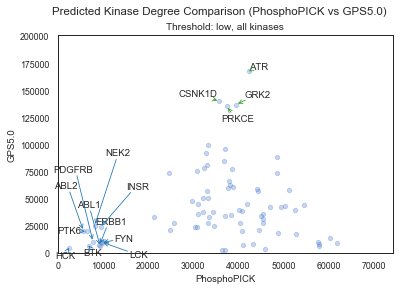

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


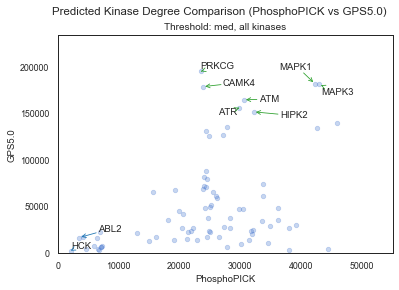

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


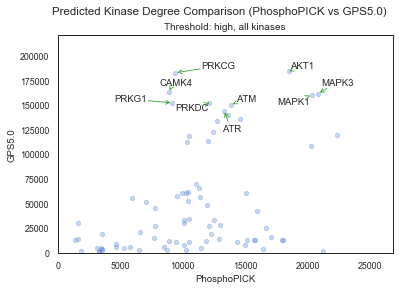

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


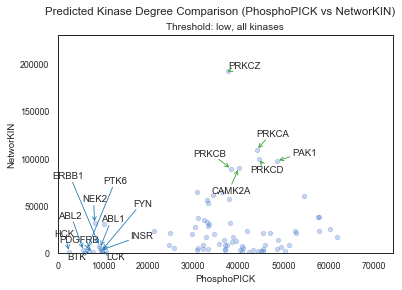

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


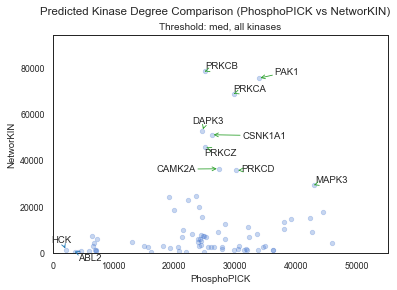

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


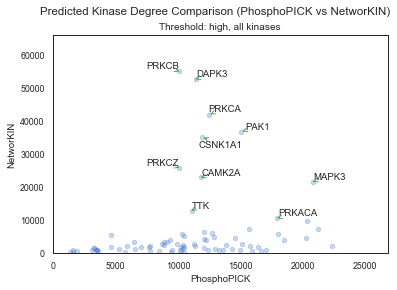

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


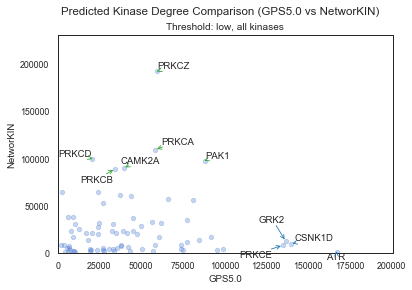

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


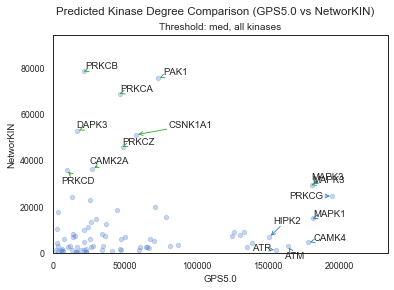

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


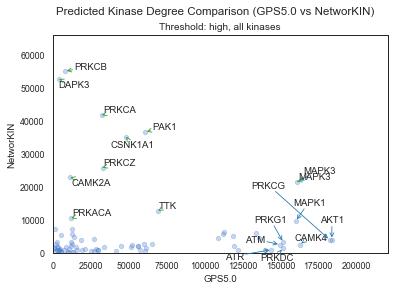

In [222]:
overlap_lo = merge_3_dfs ([pp1_kin, nw03_kin, gpsl_kin],'Kinase Name')
overlap_md = merge_3_dfs ([pp06_kin, nw05_kin, gpsm_kin],'Kinase Name')
overlap_hi = merge_3_dfs ([pp02_kin, nw1_kin, gpsh_kin],'Kinase Name')

combined_df = pd.concat([overlap_lo, overlap_md, overlap_hi])

summary_all = plot_df (combined_df, 'all kinases', 'Kinase')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


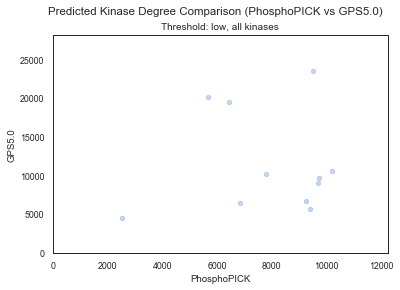

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


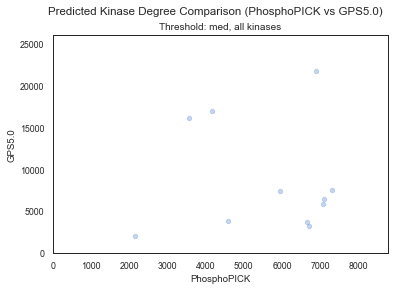

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


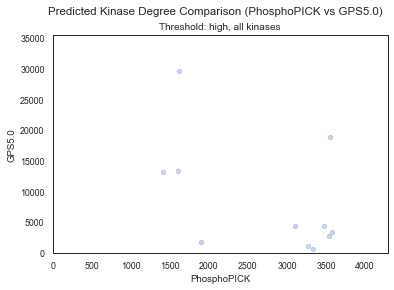

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


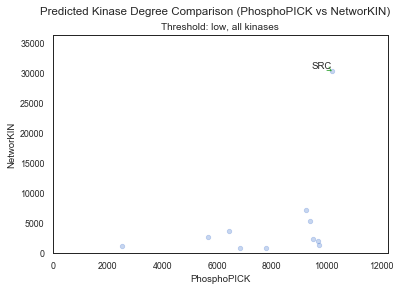

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


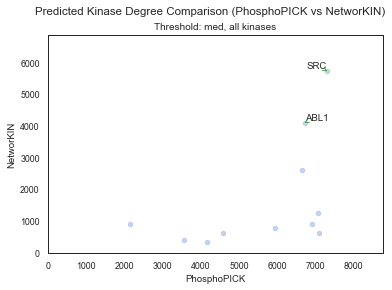

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


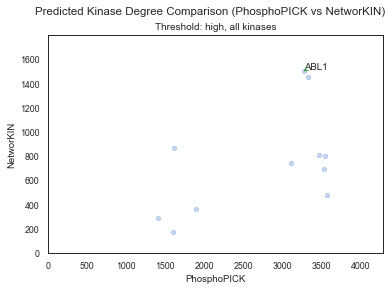

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


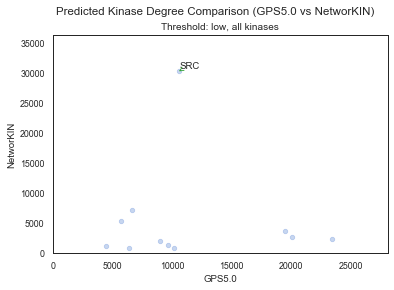

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


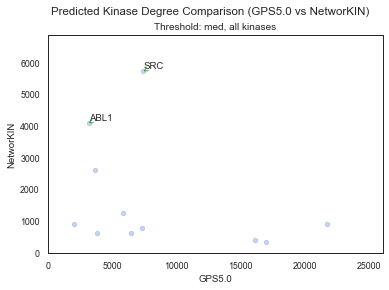

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


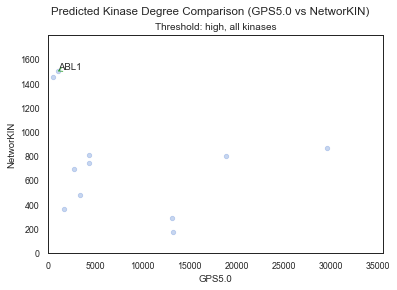

In [224]:
overlap_lo_y = merge_3_dfs ([pp1_y_kin, nw03_y_kin, gpsl_y_kin],'Kinase Name')
overlap_md_y = merge_3_dfs ([pp06_y_kin, nw05_y_kin, gpsm_y_kin],'Kinase Name')
overlap_hi_y = merge_3_dfs ([pp02_y_kin, nw1_y_kin, gpsh_y_kin],'Kinase Name')

combined_df_y = pd.concat([overlap_lo_y, overlap_md_y, overlap_hi_y])

summary_y = plot_df (combined_df_y, 'all kinases', 'Kinase')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


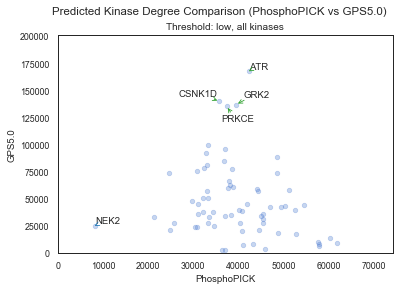

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


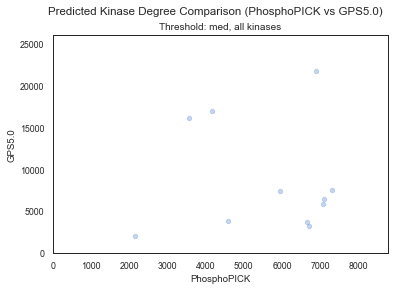

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


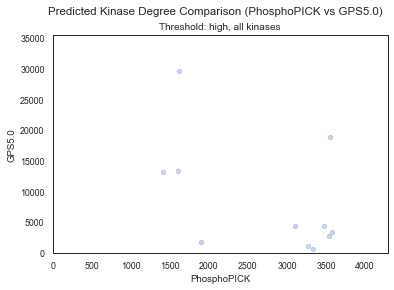

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


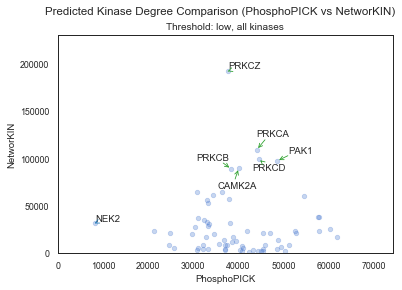

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


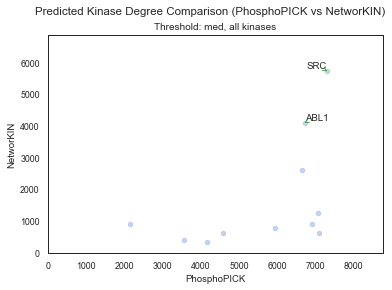

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


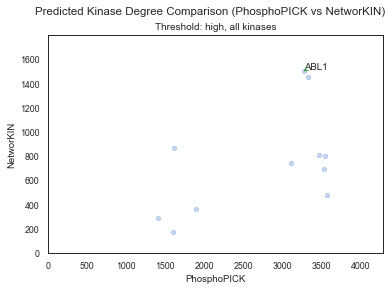

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


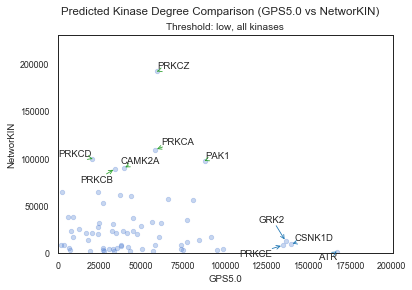

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


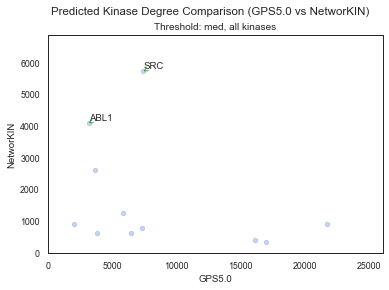

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


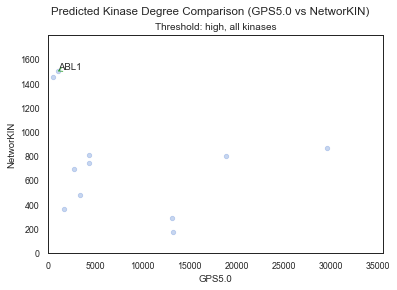

In [225]:
overlap_lo_st = merge_3_dfs ([pp1_st_kin, nw03_st_kin, gpsl_st_kin],'Kinase Name')
overlap_md_st = merge_3_dfs ([pp06_st_kin, nw05_st_kin, gpsm_st_kin],'Kinase Name')
overlap_hi_st = merge_3_dfs ([pp02_st_kin, nw1_st_kin, gpsh_st_kin],'Kinase Name')

combined_df_st = pd.concat([overlap_lo_st, overlap_md_y, overlap_hi_y])

summary_st = plot_df (combined_df_st, 'all kinases', 'Kinase')

In [243]:
# print summary table for the calculated pearson coefficients
summary_kin = summary_all.merge(summary_y, on=['Predictor1', 'Predictor2', 'Threshold'], how = 'inner')
summary_kin = summary_kin.rename(columns={'Pearson Coefficient_x': 'Pearson Coefficient_all', 
                                          'p-value_x': 'p-value_all',
                                          'Pearson Coefficient_y': 'Pearson Coefficient_Y', 
                                          'p-value_y': 'p-value_Y'})
summary_kin = summary_kin.merge(summary_st, on=['Predictor1', 'Predictor2', 'Threshold'], how = 'inner')
summary_kin = summary_kin.rename(columns={'Pearson Coefficient': 'Pearson Coefficient_S/T', 
                                          'p-value_x': 'p-value_S/T'})
summary_kin

,Predictor1,Predictor2,Threshold,Pearson Coefficient_all,p-value_all,Pearson Coefficient_Y,p-value_Y,Pearson Coefficient_S/T,p-value
0,PhosphoPICK,GPS5.0,low,0.167067,0.141124,0.045833,0.893553,-0.189270,0.122145
1,PhosphoPICK,GPS5.0,med,0.406732,0.000199,-0.029793,0.930708,-0.029793,0.930708
2,PhosphoPICK,GPS5.0,high,0.385513,0.000451,-0.509910,0.109071,-0.509910,0.109071
3,PhosphoPICK,NetworKIN,low,0.193113,0.088165,0.389542,0.236325,0.005078,0.967218
4,PhosphoPICK,NetworKIN,med,0.217967,0.053642,0.497893,0.119108,0.497893,0.119108
5,PhosphoPICK,NetworKIN,high,0.191712,0.090541,0.529189,0.094145,0.529189,0.094145
6,GPS5.0,NetworKIN,low,0.032118,0.778713,-0.053268,0.876390,-0.061193,0.620090
7,GPS5.0,NetworKIN,med,0.042002,0.713223,-0.334466,0.314733,-0.334466,0.314733
8,GPS5.0,NetworKIN,high,-0.026341,0.817754,-0.224051,0.507782,-0.224051,0.507782


In [ ]:
# may need to re-run below cells with different selected stringencies

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_med_nw_low, all kinases) is 0.17303604384397947with p-value =0.1272609910730694


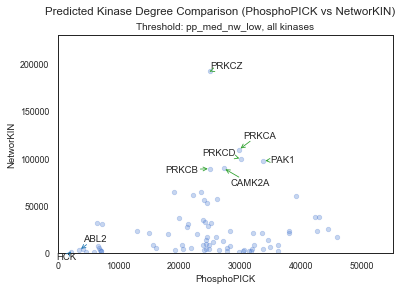

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_med_nw_low, all kinases) is 0.003211619324965928with p-value =0.977589915827027


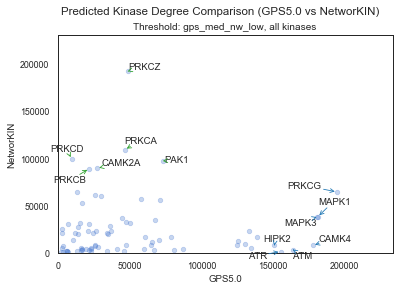

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_med_nw_low, Y kinases) is 0.3716922396366511with p-value =0.2603557516692724


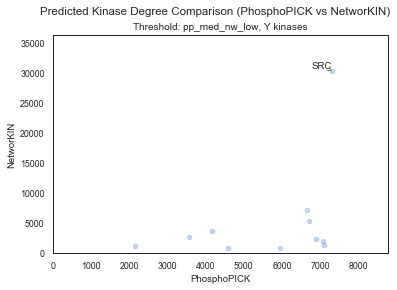

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_med_nw_low, Y kinases) is -0.06950750204213345with p-value =0.8390808222444206


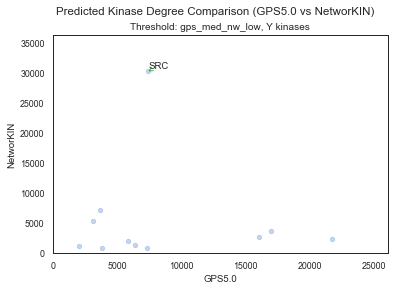

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_med_nw_low, S_T kinases) is -0.009231270338093359with p-value =0.9404428540510916


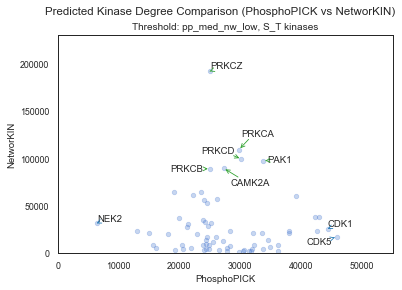

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_med_nw_low, S_T kinases) is -0.08778719424012593with p-value =0.4765473578509844


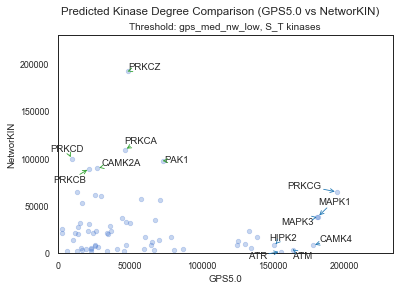

In [160]:
# Scatter plot:  mixed stringencies, nw(low) vs pp/gps(med)
# all kinases
# merge dfs of the three predictors, this will keep only the kinases predicted in all three predictors
overlap_mx = merge_3_dfs([pp06_kin,nw03_kin,gpsm_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx, 'pp', 'nw', 'pp_med_nw_low',  'all kinases')
plot_scatter (overlap_mx, 'gps', 'nw', 'pp_med_nw_low',  'all kinases')

# Y kinases
# merge dfs
overlap_mx_y = merge_3_dfs([pp06_y_kin,nw03_y_kin,gpsm_y_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx_y, 'pp', 'nw', 'pp_med_nw_low',  'Y kinases')
plot_scatter (overlap_mx_y, 'gps', 'nw', 'gps_med_nw_low',  'Y kinases')

# S/T kinases
# merge dfs
overlap_mx_st = merge_3_dfs([pp06_st_kin,nw03_st_kin,gpsm_st_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx_st, 'pp', 'nw', 'pp_med_nw_low',  'S_T kinases')
plot_scatter (overlap_mx_st, 'gps', 'nw', 'gps_med_nw_low',  'S_T kinases')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_low, all kinases) is 0.13332824808884935with p-value =0.24143919218685367


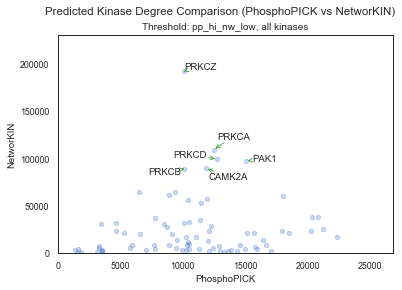

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_low, all kinases) is -0.002861359866382626with p-value =0.980033430548804


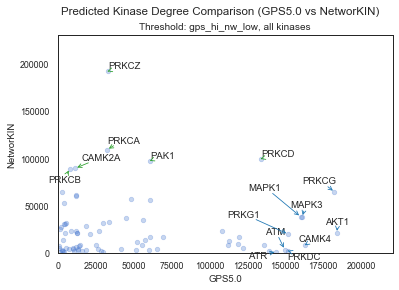

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_low, Y kinases) is 0.3027593516610192with p-value =0.3654796355617738


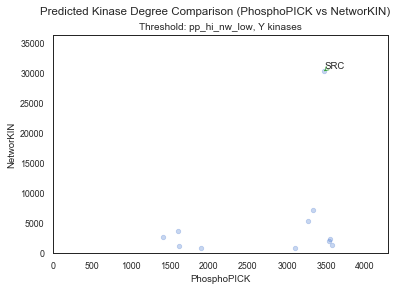

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_low, Y kinases) is -0.21739993527307308with p-value =0.5207839189094341


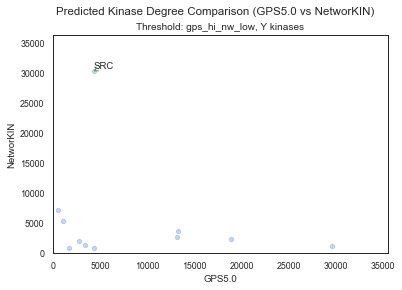

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_low, S_T kinases) is -0.03305476170793752with p-value =0.7890102041836945


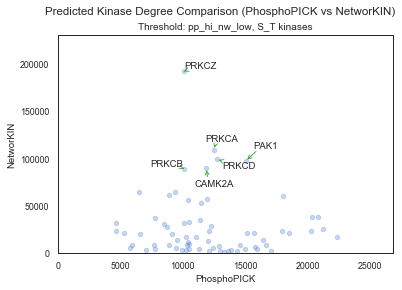

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_low, S_T kinases) is -0.08289294301261807with p-value =0.5015596660304718


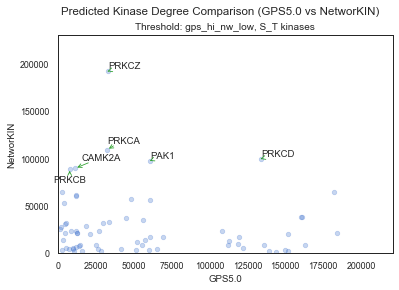

In [161]:
# Scatter plot:  mixed stringencies, nw(low) vs pp/gps(high)
# all kinases
# merge dfs of the three predictors, this will keep only the kinases predicted in all three predictors
overlap_mx = merge_3_dfs([pp02_kin,nw03_kin,gpsh_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx, 'pp', 'nw', 'pp_hi_nw_low',  'all kinases')
plot_scatter (overlap_mx, 'gps', 'nw', 'gps_hi_nw_low',  'all kinases')

# Y kinases
# merge dfs 
overlap_mx_y = merge_3_dfs([pp02_y_kin,nw03_y_kin,gpsh_y_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx_y, 'pp', 'nw', 'pp_hi_nw_low',  'Y kinases')
plot_scatter (overlap_mx_y, 'gps', 'nw', 'gps_hi_nw_low',  'Y kinases')

# S/T kinases
# merge dfs 
overlap_mx_st = merge_3_dfs([pp02_st_kin,nw03_st_kin,gpsh_st_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx_st, 'pp', 'nw', 'pp_hi_nw_low',  'S_T kinases')
plot_scatter (overlap_mx_st, 'gps', 'nw', 'gps_hi_nw_low',  'S_T kinases')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_med, all kinases) is 0.19019058264084832with p-value =0.09317773076526564


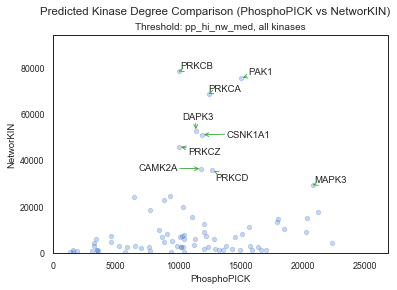

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_med, all kinases) is 0.021070566193261732with p-value =0.8537666318135584


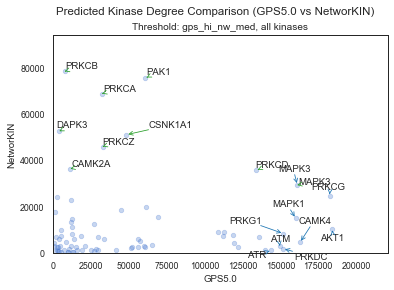

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_med, Y kinases) is 0.4754635975168816with p-value =0.13938513071918165


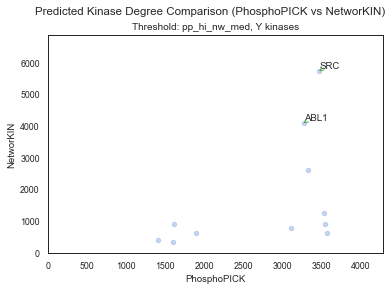

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_med, Y kinases) is -0.36893843526207915with p-value =0.26418186318259473


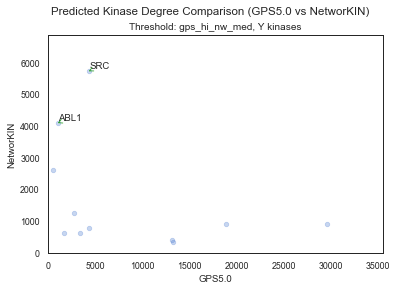

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between PhosphoPICK and NetworKIN(pp_hi_nw_med, S_T kinases) is 0.058110034314490286with p-value =0.6378538060195597


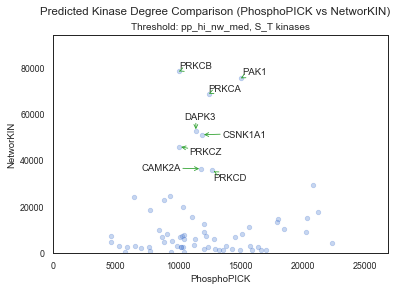

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The pearson coefficient between GPS5.0 and NetworKIN(gps_hi_nw_med, S_T kinases) is -0.05162479827818638with p-value =0.6758773636356363


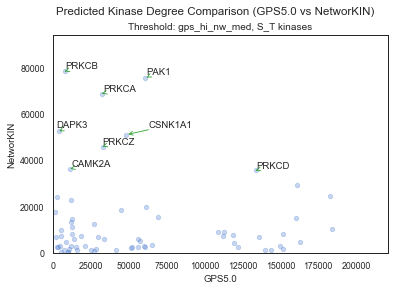

In [162]:
# Scatter plot:  mixed stringencies, nw(med) vs pp/gps(high)
# all kinases
# merge dfs of the three predictors, this will keep only the kinases predicted in all three predictors
overlap_mx = merge_3_dfs([pp02_kin,nw05_kin,gpsh_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx, 'pp', 'nw', 'pp_hi_nw_med',  'all kinases')
plot_scatter (overlap_mx, 'gps', 'nw', 'gps_hi_nw_med',  'all kinases')

# Y kinases
# merge dfs
overlap_mx_y = merge_3_dfs([pp02_y_kin,nw05_y_kin,gpsh_y_kin], 'Kinase Name')
# plot
plot_scatter (overlap_mx_y, 'pp', 'nw', 'pp_hi_nw_med',  'Y kinases')
plot_scatter (overlap_mx_y, 'gps', 'nw', 'gps_hi_nw_med',  'Y kinases')

# S/T kinases
# merge dfs
overlap_mx_st = merge_3_dfs([pp02_st_kin,nw05_st_kin,gpsh_st_kin], 'Kinase Name')
#plot
plot_scatter (overlap_mx_st, 'pp', 'nw', 'pp_hi_nw_med',  'S_T kinases')
plot_scatter (overlap_mx_st, 'gps', 'nw', 'gps_hi_nw_med',  'S_T kinases')
